##  Introducing the Fibonacci sequence

We start with a sequence of numbers called the **Fibonacci sequence**:

In [6]:
a,b = (1,1)

print(f"\n{a}",end=" ")

for i in range(20):
    print(f"{b}",end=" ")
    a,b = b, a+b
    
print("...")


1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 ...


Note that each term after the first `1 1` is the sum of the previous two terms.  The code snippet above
just implements this simple idea, maintaining a pair consisting of the last two integers in the sequence which is used to construct the next pair.  This is an **exponentially growing** series even though it's extended by addition.  It's exponential because the amount added at each step grows, like successive generations of rabbits. In fact, the legend is that Fibonacci was trying to solve a problem about rabbit population size when he first defined the series that is named after him.

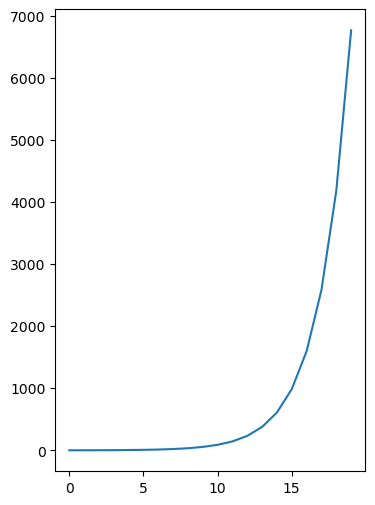

In [7]:
from matplotlib import pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(4,6))

a,b=1,1
y =[a,b]

for i in range(18):
    (a,b) = (b, a+b)
    y.append(b)

ax.plot(np.arange(20),y)

The Fibonacci Sequence crops up in many places in nature, mathematics, and applied mathematics (of which
Computer Science is one large branch).  [Wikipedia](https://en.wikipedia.org/wiki/Fibonacci_sequence) tells us:

> Applications of Fibonacci numbers include computer algorithms such as the Fibonacci search technique and the Fibonacci heap data structure, and graphs called Fibonacci cubes used for interconnecting parallel and distributed systems. They also appear in biological settings, such as branching in trees, the arrangement of leaves on a stem, the fruit sprouts of a pineapple, the flowering of an artichoke, and the arrangement of a pine cone's bracts ...

## The Golden Ratio and the Fibonacci sequence

The theme of this notebook is how the structure of the Fibonacci sequence is tangled up with
a single number called the **the golden ratio**.

Below we draw the Golden Rectangle, so called because the proportions of its sides 
a and b are "golden".  What makes them golden is that proportion of the larger rectangle
below it, constructed with sides a+b and b, are the same.


That is,

$$
\frac{b}{a} = \frac{b+a}{b}
$$


#### Useful references 

1. [Reich's discussion of Fibonacci numbers](https://math.temple.edu/~reich/Fib/fibo.html)
2. [Mathworld Wolfram on loarithmic spirals.](https://mathworld.wolfram.com/LogarithmicSpiral.html)
3. [Wikipedia spiral page.](https://en.wikipedia.org/wiki/Spiral)   See especially for definition of polar slope angle.
4. [Wikipedia Logarithmic Spiral page.](https://en.wikipedia.org/wiki/Logarithmic_spiral)
5. [Basic differential geometry definition definition of tangential angle](https://mathworld.wolfram.com/TangentialAngle.html)

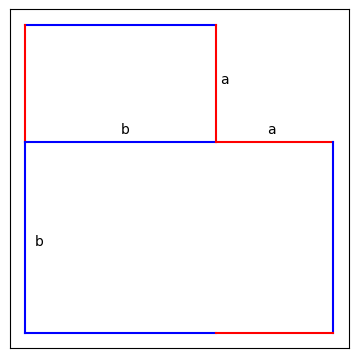

In [1]:
import numpy as np
from matplotlib import pyplot as plt

phi = 2* np.cos (np.pi/5)
a,b = 1,phi

fig, ax0 = plt.subplots(1,1,figsize=(4.4,4.4))

# side b lower
ax0.plot([0,b], [0,0],c="b")
#side b upper
ax0.plot([0,b], [a,a],c="b")
# side a left
ax0.plot([0,0], [0,a],c="r")
# side a right
ax0.plot([b,b], [0,a],c="r")

# Lower a extension
ax0.plot([b,b+a],[0,0],c="red")

#Lower b extensions
ax0.plot([0,0],[0,-b],c="b")
ax0.plot([b+a,b+a],[0,-b],c="b")

# Lower Parallels
# b part
ax0.plot([0,b], [-b,-b],c="b")
# a part
ax0.plot([b,b+a],[-b,-b],c="r")

ax0.set_aspect("equal")
ax0.set_xticks([],[])
ax0.set_yticks([],[])
ax0.annotate('b', xy=(b/2, .08))
ax0.annotate('b', xy=(.08, -.54*b))
ax0.annotate('a', xy=(b, a/2), xytext=(3, 0), textcoords="offset points")
_ = ax0.annotate('a', xy=(b+.4*a, .08), xytext=(3, 0), textcoords="offset points")

Letting $\phi$ be the proportion we seek ($\phi=b/a$), we can write:

$$
\phi = 1 + \frac{1}{\phi}
$$

The positive solution to the quadratic equation is (using the quadratic formula):

$$
\phi = \frac{1 + \sqrt{5}}{2}
$$

This number is the **Golden ratio** (yes, that's right, the god(desse)s of Math have decreed
that the Golden Ratio is irrational).  We compute its value (as best it can be computed) in the next cell.

In [2]:
phi = (1 + np.sqrt(5))/2
phi

1.618033988749895

You can also use numpy to directly compute the roots of the equation:

In [3]:
#  Solve the quadratic equation x^2 - x - 1 = 0 using numpy (=np)
phi0, psi0 = np.roots([1,-1,-1])
phi0,psi0

(1.618033988749895, -0.6180339887498948)

Note that there are TWO solutions.  For now, we'll ignore the negative one because we don't know how to draw rectangles with sides of negative length.  Later on we will make use of both values.  The two values are "negative inverses".  That is

In [4]:
phi0*psi0

-0.9999999999999999

A note:  Though we do not illustrate this in the diagram, the construction above is recursive, because the second rectangle is just as much a golden rectangle as the first.  Therefore we can repeat the construction and draw a third rectangle with sides 2b + a, b + a below the second.  That rectangle too will be golden.  And below that we can construct a fourth golden rectangle, and so on.  It's golden rectangles all the way down.

We never solved for $a$ and $b$ of course. But these conclusions are true for any rectangle with golden proportions.  So consider $a=1$ and $b=\phi$. Then the third rectangle's proportions must be golden as well
and that means

$$
\frac{2b+a}{b+a} = \frac{2\phi + 1}{\phi + 1} = \phi
$$

And indeed

In [5]:
(2*phi + 1)/(phi + 1)

1.618033988749895

And since

$$
\phi = 1 + \frac{1}{\phi} = \frac{\phi + 1}{\phi}
$$

we have

$$
\begin{array}{rr}
1     & \phi^0\\
\phi  & \phi^1\\
\phi + 1 & \phi^2\\
2\phi + 1 & \phi^{3}
\end{array}
$$

Hmmm.  The sides of the successive rectangles are powers of $\phi$! We'll return to the significance of this relationship below.

In the meantime note: So also for a rectangle with sides $3\phi+2$ and $2\phi +1$: as we keep growing the rectangle sides  the ratio remains constant.

And here is the first of many connections of the Golden Ratio $\phi$ to the Fibonnaci
Sequence:  At the limit, the ratio of successive terms in the Fibonacci sequence is $\phi$.
We demonstrate:

In [8]:
# Another way of computing phi is 2* np.cos (np.pi/5).  Explained below.
print(f"                       phi = {2* np.cos (np.pi/5)}",end="\n\n")
   

a,b = (1,1)
print("  i     Fib(i-1)   Fib(i)    Fib(i)/Fib(i-1)")
print("-"*42)
for i in range(1,31):
    print(f"{i: >3d}  {a:>8d}  {b: 8d}      {b/a}")
    a,b = b, a+b

                       phi = 1.618033988749895

  i     Fib(i-1)   Fib(i)    Fib(i)/Fib(i-1)
------------------------------------------
  1         1         1      1.0
  2         1         2      2.0
  3         2         3      1.5
  4         3         5      1.6666666666666667
  5         5         8      1.6
  6         8        13      1.625
  7        13        21      1.6153846153846154
  8        21        34      1.619047619047619
  9        34        55      1.6176470588235294
 10        55        89      1.6181818181818182
 11        89       144      1.6179775280898876
 12       144       233      1.6180555555555556
 13       233       377      1.6180257510729614
 14       377       610      1.6180371352785146
 15       610       987      1.618032786885246
 16       987      1597      1.618034447821682
 17      1597      2584      1.6180338134001253
 18      2584      4181      1.618034055727554
 19      4181      6765      1.6180339631667064
 20      6765     10946      

The key point is that the members of the sequence eventually come to have the same relationship
as the sides of the golden rectangles (which are powers of $\phi$) in the recursive construction
above: their ratio is $\phi$.  In the appendix we sketch a proof of this wonder.  It will depend on
discovering a relationship between successive members of the sequence and successive powers of $\phi$.

The next cell contains Python code implementing a variety of ways to compute Fibonacci sequences,
including an iterative function, a recursive function, a Python generator (really a special kind
of iteration function), two matrix powers computations, and a closed form function (derived
from the matrix powers algorithm).  The last is the most efficient, but not by as much as
you might think.

What the variants demonstrate is the difference between three ideas: implementation, algorithm,
and function. An algorithm is a step-by-step recipe for computing something. Even though it
must be specific enough to be implementable, it may still leave out many details of how
the computation is done.  Arguably, there are only two algorithms in the code below, the 
summing of successive integer pairs we demonstrated above, and the closed form computation
that is the result of mathematical insight.  More precisely, the algorithm we presented is

$$
\begin{array}{ll}
\text{while} &\text{ctr} < n:\\
              &(a,\, b) \mapsto (b,\, a + b)\\
              &\text{ctr} += 1
\end{array}
$$

An implementation of an algorithm is a specific
embodiment in code.  Below we give iterative and recursive versions of the successive summing
algorithm for computing the nth Fibonacci number.  Then we give a Python generator version,
which is only a slight implementational variant of the iterative version, but that variant
can have huge memory usage advantages.  Then we move on to a matrix powers implementation
which involves taking the nth power of a matrix to compute the nth Fibonacci term.  That looks
very different but in fact each successive multiplication by the Fibonacci matrix just maps
$(a,\, b)$ to $(b,\, a + b)$, essentially the same algorithm.  We then present a variation
of the matrix powers idea which implements taking the nth power by diagonalizing the
Fibonacci matrix, allowing a significant speed-up because taking powers of diagonal
matrixes is much faster. Still the matrix multiplications involved  just
map successive values of $(a,\, b)$ to $(b,\, a + b)$. Finally there is a closed form 
computation involving something called Binet's Formula. This exploits the relationship between
Fibonacci numbers and power of $\phi$ that we noted above.  And it is a genuine break with 
the other methods for computing $\text{F}_{n}$.
We defer explanation of the relationship until later.  For now it will suffice to 
examine the formula like something dropped from the sky:

$$
\text{F}_{n} = \frac{1}{\sqrt{5}}(\phi^{n} - (1 - \phi)^{n})
$$

No obvious connection, is there?  No successive mapping of pairs, no successive summing. And suddenly, magically,
$\phi$ appears in what is probably the most compelling illustration of the deep connection of $\phi$ 
and the Fibonacci sequence. And by the way, 
where did $\sqrt{5}$ come from? This is a different algorithm.  Conceptually,
it is a short step from the computation by diagonalized matrix (we sketch the step below), but
in that step everything has changed.  As to computational efficiency, it must be an improvement (but see
the actual timing results below).  

Final distinction to be made. What's practical.  The closed form approach implemented
below is faster, consistently twice as fast on my MacBookPro 18,3 with an 8-core Apple M1 Pro
CPU.  However it does not get the right answer for large n.  For example, for $\text{F}_{100}$
we have

$$
\begin{array}{l|cc|cc}
                    &  \text{F}_{72}  & \Delta  &  \text{F}_{100} & \Delta \\
                    \hline
\text{Closed form}  & 498,454,011,879,265 &1 & 354,224,848,179,263,111,168 & 1,196,093\\
\text{Iterative} &  498,454,011,879,264  & \_  &  354,224,848,179,261,915,075 & \_
\end{array}
$$

At n= 72, the closed form function 
differs by 1 from the iterative function (which agrees with Google and WolframAlpha in its results);
by n =100, the difference is nearly 1.2 million. The details may vary on various
machines, but I'll note that Fabian Dablander (cited below) also cites major
issues around this value of n.  

The problems actually start at lower numbers.  The attentive code-reader will note
that the definition of `fibonacci_closed_form` wraps the expression
in the `int(...)` function before returning a value.  This is because the function 
would never return an integer value otherwise.  For example, here's the value returned for n=12
with no `int` wrapper

In [119]:
(phi**12 - neg_phi_inv**12)/np.sqrt(5)

144.00000000000006

The math is completely correct and completely accurate.  The problems start with the $\sqrt{5}$
in the definition of $\phi$, which is an irrational number that cannot be precisely represented
on a computer.  The minute you type `np.sqrt(5)` into Python you're dealing with an approximation. The problems then  mount up because floating point calculations generally inflate errors 
the more operations they require, and eventually, by the time you get to
$n=100$, you have an error of over 1 million, which sounds awful, but really isn't so bad when you 
consider you're computing a number over 350 quintillion. That's an error of about
$0.0000000000003\%$.

The moral: In the end practical considerations may trump everything, including the best
math and computer science.  The reason to be educated about programming is to know what
your options are.  For most conceivable purposes, an error of $0.0000000000003\%$ will
be no error at all and you can run with the faster alternative. However, if you
happen to be entered in a competitive computing tournament, it may be disastrous.  The good
old iterative algorithm we started with may well be a better option.  Other considerations
that may affect your choice: the amount of memory on your machine, 
the structure of your problem (for example,
whether your problem can be formulated in matrix form),
the real world usage context (are you putting this code on a server
with thousands of hits an hour, so that efficiency practically outweighs all
else?), whether parallelism can be deployed, and so on.

In [46]:
from matplotlib import pyplot as plt
import numpy as np
from functools import cache

def fibonacci_seq_n_iterative(n):
    """
    Return the nth Fibonacci number.
    
    Classic iterative definition of fibonacci sequence.
    """
    assert n > 0,"Use only positive n"
    a,b=(1, 1)
    #  This works on the corner cases n=0 n=1 because
    #  list(range(-1)) and list(range(0)) are both []
    #  (the right behavior if you think about
    #  the default values for the range parameters 
    #  start and step)
    for i in range(1,n):
        a,b = (b, a+b)
    return a


def fibonacci_seq_n2 (n):
    """
    Non-caching Copy of fibonacci_seq_n for demonstrating exponential complexity growth.  Do not use for fun.
    
    Return the nth Fibonacci number.
    
    Classic recursive definition of fibonacci sequence.
    
    Decorator introduces caching.
    """
    assert n > 0,"Use only positive n"
    if n == 1:
        return 1
    elif n == 2:
        return 1
    else:
        return fibonacci_seq_n2(n-2) + fibonacci_seq_n2(n-1)

@cache
def fibonacci_seq_n (n):
    """
    Return the nth Fibonacci number.
    
    Classic recursive definition of fibonacci sequence.
    
    Decorator introduces caching.  So not exponential.
    """
    assert n > 0,"Use only positive n"
    if n == 1:
        return 1
    elif n == 2:
        return 1
    else:
        return fibonacci_seq_n(n-2) + fibonacci_seq_n(n-1)

def fibonacci_seq_n_log2 (n):
    """
    Return the nth Fibonacci number.
    
    Recursive definition of fibonacci sequence using the recurrence relation
    
       F_{m=2n} = F_{n}(2F_{n+1} + F_{n})    # Even m
       F_{m=2n-1} = F_{n}^2 + F_{n-1}^2      # Odd m
    
    
    """
    assert n > 0,"Use only positive n"
    if n == 1:
        return 1
    elif n == 2:
        return 1
    (q,r) = divmod(n,2)
    #if nm2 is not None and nm2 is None:
    Fq =  fibonacci_seq_n_log2(q)
    if r:
        qp = q + 1  ## we want n = 2qp-1
        Fqp = fibonacci_seq_n_log2(qp)
        return Fqp**2 + Fq**2
    else:
        return Fq**2 + 2*Fq*fibonacci_seq_n_log2(q-1)
    
def fibonacci_tail(n):
    """
    Attemot to do tail recursion optimization by hand
    """
    def fibonacci_helper(n, acc1, acc2):
        if n == 0:
            return acc1
        return fibonacci_helper(n - 1, acc2, acc1+acc2)
    return fibonacci_helper(n, 0, 1)

from bitstring import BitArray
#https://bitstring.readthedocs.io/en/stable/

def bits(n):
    return BitArray(bin(n))
#a = BitArray(6000000)
#a=BitArray(uint=42, length=8)

def old_bits(n):
  """Represent an integer as an array of binary digits.
  """
  bits = []
  while n > 0:
    n, bit = divmod(n, 2)
    bits.append(bit)
  bits.reverse()
  return bits
 
def fib_mat(n):
  assert n >= 0
  a, b, c = 1, 0, 1
  for bit in old_bits(n):
    a, b, c = a*a + b*b, a*b + b*c, b*b + c*c
    if bit: a, b, c = b, c, b+c
  return b

def fib_fast(n):
  assert n >= 0
  a, b, c = 1, 0, 1
  for bit in old_bits(n):
    if bit: a, b = (a+c)*b, b*b + c*c
    else:   a, b = a*a + b*b, (a+c)*b
    c = a + b
  return b

def fibonacci_seq_n_generator(n):
    """
    A generator that yields the Fibonacci sequence up to n or generates
    it an integer at a time.
    """
    assert n > 0,"Use only positive n"
    a,b=(1, 1)
    #  This works on the corner cases because
    #  list(range(-1)) and list(range(0)) are both []
    #  (the right behavior if you think about
    #  the default values for the range parameters 
    #  start and step)
    for i in range(n):
        yield a
        a,b = (b, a+b)
        
##########################################################################
#  Linear Algebra computation of Fib_n using powers of a matrix 
########################################################################

########################################################################
# Things to precompute
########################################################################

# Fib relation is a linear map
# (a b) |->  (a+b a)
fib_M = np.array([[1,1],[1,0]])
init = np.array([1,0])
##  this works too but the form is
## # (a b) |->  (b a+b)
fib_M2 = np.array([[0,1],[1,1]])
init2 = np.array([0,1])

# fib_M eigen values are -1/phi, and phi 
# fib_M eigen vecs are unit vecs pointing in the direction
# of (1,phi) and (1,-1/phi) !
fib_evals, fib_evecs = np.linalg.eig(fib_M)
# Precompute the change of basis into the eigenspace
eigenspace_init = fib_evecs.T@init
evals_diag = np.diag(fib_evals)
# Some constants
phi = (1 + np.sqrt(5))/2
log_phi = np.log(phi)
## == phi**(-1)
phi_inv = phi - 1
log_phi_inv = np.log(phi_inv)
psi = -phi_inv
## 
phi_10 = phi**(10)
phi_m10 = phi**(-10)

@cache
def fib_matrix_power(n):
    """
    Make this a user function to enable caching.
    """
    return np.linalg.matrix_power(fib_M,n)


def fibonacci_seq_n_matrix (n):
    # Fib relation is a linear map
    # (a b) |->  (b a+b)
    # Return a from the nth power of the corresponding matrix
    return (fib_matrix_power(n-1)@init)[0]

def fibonacci_seq_n_matrix_diag(n):
    """
    Supposedly more efficient version of fibonacci_seq_n_matrix that uses
    diagonalized form of fib_M
    """
    # The version below should be equivalent to what's being used (but slower)
    #return (fib_evecs@np.linalg.matrix_power(evals_diag,n)@eigenspace_init)[0]
    return (fib_evecs@evals_diag**(n-1)@eigenspace_init)[0]

def fibonacci_closed_form (n):
    """
    Reputation as the Fastest Fib_n computation.
    Another illustration of the close connection of phi and fib.
    Recall that -1/phi = 1 - phi, so neg_phi_inv is defined as 1-phi.
    """
    return int((phi**n - psi**n)/np.sqrt(5))


def fibonacci_closed_form_exp (n):
    """
    This actually has slightly greater accuracy problems for large n.  But is
    competitive efficiency wose.
    """
    return int(1/np.sqrt(5)*(np.exp(log_phi*n) - ((-1)**n) * np.exp(log_phi_inv*n)))

In [181]:
fibonacci_seq_n(24),fibonacci_seq_n_log2(24)

(46368, 46368)

In [47]:
fibonacci_seq_n(25),fibonacci_seq_n_log2(25)

(75025, 75025)

## Notes on the code above

After you've used it with a large value, or while debugging, it may be a good idea to do this
because of the `@cache` decorator in the function definition.
which saves whatever values it computes and does not need to do the 
full recursion the second time through a particular n.

In [720]:
fibonacci_seq_n.cache_clear()

Saves memory, or while debugging it flushes possibly incorrect values.

In [75]:
divmod(24,2)

(12, 0)

In [23]:
fibonacci_tail(12)

144

In [69]:
f12 = fibonacci_seq_n (12)
f12**2 + 2* f12 * fibonacci_seq_n (11)

46368

In [68]:
fibonacci_seq_n (24)

46368

In [31]:
fibonacci_seq_n_matrix(12)

144

In [32]:
fibonacci_seq_n_matrix_diag(12)

144.00000000000003

In [7]:
print(f"{fibonacci_closed_form (50):,}")

12,586,269,025


In [32]:
print(f"{fibonacci_closed_form_exp (50):,}")

12,586,269,025


In [8]:
fibonacci_closed_form (50)

12586269025

In [9]:
for i in range(1, 13):
    print(i,fibonacci_seq_n_iterative(i))

1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34
10 55
11 89
12 144


In [119]:
fibonacci_seq_n_iterative(50)

12586269025

In [120]:
fibonacci_seq_n(50)

12586269025

In [121]:
fibonacci_closed_form(50)

12586269025

####  Generator version

In [204]:
g = fibonacci_seq_n_generator(12)

In [205]:
next(g)

1

In [206]:
list(fibonacci_seq_n_generator(12))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]

In [4]:
g = fibonacci_seq_n_generator(12)
print(list(g))
# this produces an error
next(g)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]


StopIteration: 

In [780]:
for x in fibonacci_seq_n_generator(12):
    print(x)

1
1
2
3
5
8
13
21
34
55
89
144


## Timing results for the various Fibonacci n-functions

There are some surprises awaiting.  Be aware.  Your mileage may vary.  All I can say is this is what happened on my Mac.

The `timeit` module is said to be best performance measurer for small chunks of code.  We'll use it. The first function timed (`fibonacci_seq_n`) generally achieves the best results.  

That's a bit of a surprise.  This is the recursive version of Fibonacci...

What's going on?

In [33]:
import timeit
n,iters = 500,10_000

# Now use the caching version.  But clear the cache first
#fibonacci_seq_n.cache_clear()
# Recursive implementation, almost always the fastest, go figure
#timer = timeit.Timer(lambda: fibonacci_seq_n(n))
#elapsed3 = timer.timeit(iters)
elapsed3 = timeit.timeit(lambda: fibonacci_seq_n(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.003123 seconds


Oh, the cache!  Let's try clearing it!

In [44]:
import timeit
n,iters = 500,10_000

# Now use the caching version.
fibonacci_seq_n.cache_clear()
# Recursive implementation, almost always the fastest, go figure
#timer = timeit.Timer(lambda: fibonacci_seq_n(n))
#elapsed3 = timer.timeit(iters)
elapsed3 =  timeit.timeit(lambda: fibonacci_seq_n(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.003884 seconds


That made very little difference!  

Can you guess why that is, in the context of measuring performance?

Wait, let's try a version of the same function with  no caching at all...  And because I have some sense
of what's about to happen, ket's try that on a much lower value of $n$ first, $n=40$.

In [3]:
import timeit
n,iters = 40,10

elapsed3 =  timeit.timeit(lambda: fibonacci_seq_n2(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 80.422317 seconds


We have an average of 8 secs for computing $F_{40}$.  Estimated time for $F_{n=50}$ with linear growth in computation time: 10 secs.

In [4]:
import timeit
n,iters = 50,1

elapsed3 =  timeit.timeit(lambda: fibonacci_seq_n2(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 996.386352 seconds


Whoa!  Computing time for the recursive version with no caching definitely does **not** grow linearly.  We see
that as $n$ grows, computing time for that recursive version grows exponentially!

Here's the code for the recursive function.

```python
def fibonacci_seq_n (n):
    """
    Return the nth Fibonacci number.
    
    Classic recursive definition of fibonacci sequence.
    
    Decorator introduces caching.  So not exponential.
    """
    assert n > 0,"Use only positive n"
    if n == 1:
        return 1
    elif n == 2:
        return 1
    else:
        return fibonacci_seq_n(n-2) + fibonacci_seq_n(n-1)
```

The **recursion relation** (the relation defining when the function calls itself) is:

$$
\text{fibonacci_seq_n} (n) = \text{fibonacci_seq_n}(n-2) + \text{fibonacci_seq_n}(n-1)
$$

So, abbreviating its name to $f$,
here is a partial computational tree for $\text{fibonacci_seq_n}$ (the computational tree for
 $\text{fibonacci_seq_n}$ tells us what functions $\text{fibonacci_seq_n}$ needs to call in order 
 to compute $\text{fibonacci_seq_n}(n)$, and then what functions those functions need to call, and so on.

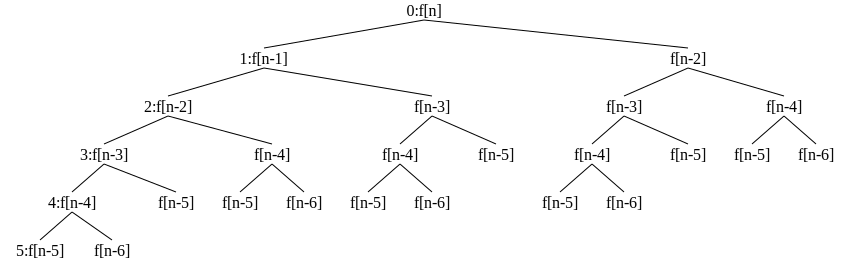

In [1]:
# Note for this to work svgling must be installed (`! pip install svgling`) in addition to nltk
from nltk.tree import Tree
t = Tree.fromstring("(0:f[n] (1:f[n-1] (2:f[n-2] (3:f[n-3] (4:f[n-4] 5:f[n-5] f[n-6]) f[n-5]) (f[n-4] f[n-5] f[n-6]))"
                    "(f[n-3] (f[n-4] f[n-5] f[n-6]) f[n-5])) (f[n-2] (f[n-3] (f[n-4] f[n-5] f[n-6]) f[n-5])"
                    "(f[n-4] f[n-5] f[n-6])))")
t

The tree has only been  expanded as far as `f[n-5]` and `f[n-6]`.  If  we follow the code and call `n=1` and `n=2` the "base cases" (where the function doesn't recurse), this would be the entire computational tree for `n=7`; if `n>7`, each of the "leaf" nodes at the bottom of the tree would need further expanding, generating an arbitrarily deep tree of its own.

The first thing to notice is the generation numbers on the left.  The root of the tree is generation 0; its daughters are generation 1; its grandaughters generation 2, and so on.  With each generation the number of computations to perform doubles.  For example there are 2  computations (`f[n-1]` and `f[n-2]`) in generation 1 
and 4 in generation 2: `f[n-2]`, `f[n-3]`, `f[n-3]`(again) and  `f[n-4]`.  If tree were further expanded at generation 4 (because `n>7`), there would be $2^4$ or 16 computations.  So in general the number of computational operations at the bottom of a tree with $n$ generations is $2^{n}$; since the $n$ is an exponent, the computational complexity for this recursive function is called **exponential**. Exponential complexity is a pretty good indicator of **intractability**,  in the sense that in very short order, the computational needs will overwhelm whatever computaional resources you have on tap.  We have just demonstrated this for a naive implementation of `fibonacci_seq_n`.

The second thing to notice about the computational tree above is the number of times the same thing is computed. For example, `f[n-5]` is computed 8 times, `f[n-4]` is computed 4 times.  Obviously that's contributing to our exponential growth.  This suggests a fix.  Remember the results of each computation after completing it.  Now instead of expanding the tree for `f[n-5]` 8 times, you only compute it once, and look up the answer the next 7 times it comes up.  This strategy is called **memoization** (no "r", though the idea suggests there should be), and it converts the exponential computation above into a linear computation: `n` times a constant number of steps.
We have defined both memoized and non-memoized versions of `fibonacci_seq_n` above.  In Python, you memoize a function with a simple "decorator" declaration above the function definition:

```python
@cache
def function_to_be_cached (param1, param2, ...):
    Function_body
```

is enough to make `fibonacci_seq_n` linear and practical.  The uncached version, `fibonacci_seq_n2`, is thoroughly impractical, as we just demonstrated.

Note, however that there is a recursive way of computing the nth Fobonacci number which is not exponential.  We have a variant recursive function called `fibonacci_seq_n_log2`, which uses adifferent recursion relation. Even without caching it is still a strong contender:

In [183]:
import timeit
n,iters = 40,10

elapsed3 =  timeit.timeit(lambda: fibonacci_seq_n_log2(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.000067 seconds


In [17]:
import timeit
n,iters = 500,10

elapsed3 =  timeit.timeit(lambda: fibonacci_seq_n_log2(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.000570 seconds


Without further ado, let's do some preliminary timing tests:

In [18]:
import timeit
n,iters = 500,10_000


# Iterative implementation
elapsed3 =  timeit.timeit(lambda: fibonacci_seq_n_iterative(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.161157 seconds


In [19]:
import timeit
n,iters = 500,10_000

# Matrix implementation plain matrix powers calculation
elapsed3 =  timeit.timeit(lambda: fibonacci_seq_n_matrix(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.021186 seconds


So not faster....  There is an improvement possible...  later ...

In [20]:
import timeit
n,iters = 500,10_000

# Matrix implementation with diagonalization, eigen computations precomputed (surprisingly bad)
timer = timeit.Timer(lambda: fibonacci_seq_n_matrix_diag(n))
elapsed3 = timer.timeit(iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.032299 seconds


In [21]:

import timeit
n,iters = 500,10_000

# The best closed form variant with issues discussed above
# Surprisingly NOT the fastest
#timer = timeit.Timer(lambda: fibonacci_closed_form(n))
#elapsed22 = timer.timeit(iters)
elapsed3 =  timeit.timeit(lambda: fibonacci_closed_form(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.016460 seconds


In [23]:
import timeit
n,iters = 500,10_000

# A closed form variant using exp or exponentiation
# The conversion of phi and phi^{-1} to log form is precomputed, so its 
# ... exp(n*log_phi) - ... exp(n*log_inv_phi) ...
#timer = timeit.Timer(lambda: fibonacci_closed_form_exp(n))
#elapsed3 = timer.timeit(iters)
elapsed3 =  timeit.timeit(lambda: fibonacci_closed_form_exp(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.035051 seconds


In [24]:
import timeit
n,iters = 500,10_000

# A closed form variant using exp or exponentiation
# The conversion of phi and phi^{-1} to log form is precomputed, so its 
# ... exp(n*log_phi) - ... exp(n*log_inv_phi) ...
#timer = timeit.Timer(lambda: fibonacci_closed_form_exp(n))
#elapsed3 = timer.timeit(iters)
elapsed3 =  timeit.timeit(lambda: fibonacci_seq_n_log2(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.434210 seconds


Better method.  Do timing runs for different systems as closely together as possible to keep
background computational load as similar as possible.

In [25]:
import timeit
n,iters = 500,10_000

fns = fibonacci_seq_n, fibonacci_seq_n_iterative,fibonacci_seq_n_matrix,\
                    fibonacci_seq_n_matrix_diag,fibonacci_closed_form,fibonacci_closed_form_exp,fibonacci_seq_n_log2

fn_dict= dict()
for fn in fns:
    fn_dict[fn.__name__] = timeit.timeit(lambda: fn(n),number=iters)

In [26]:
n,iters = 500,10_000
time_list = sorted(list(fn_dict.items()),key=lambda x: x[1])
for (fn_name,elapsed)  in time_list:
    print(f'{fn_name:<30} {elapsed:.6f}')

fibonacci_seq_n                0.002491
fibonacci_seq_n_matrix         0.007012
fibonacci_closed_form          0.008814
fibonacci_closed_form_exp      0.018713
fibonacci_seq_n_matrix_diag    0.024289
fibonacci_seq_n_iterative      0.164255
fibonacci_seq_n_log2           0.411215


In [188]:
time_list = sorted(list(fn_dict.items()),key=lambda x: x[1])
for (fn_name,elapsed)  in time_list:
    print(f'{fn_name:<30} {elapsed:.6f}')

fibonacci_closed_form          0.008741
fibonacci_seq_n_matrix         0.010310
fibonacci_seq_n                0.013675
fibonacci_closed_form_exp      0.019026
fibonacci_seq_n_matrix_diag    0.024515
fibonacci_seq_n_iterative      0.144307
fibonacci_seq_n_log2           0.410670


In [189]:
time_list = sorted(list(fn_dict.items()),key=lambda x: x[1])
for (fn_name,elapsed)  in time_list:
    print(f'{fn_name:<30} {elapsed:.6f}')

fibonacci_closed_form          0.008741
fibonacci_seq_n_matrix         0.010310
fibonacci_seq_n                0.013675
fibonacci_closed_form_exp      0.019026
fibonacci_seq_n_matrix_diag    0.024515
fibonacci_seq_n_iterative      0.144307
fibonacci_seq_n_log2           0.410670


### More systematic timing

The big flaw of the previous approaches is not exploring multiple values of n.   Bad algorithms
often blow up somewhere along the way as `n` (some characerization of the size of the
problem) increases.  In fact we saw that above with `fibonacci_seq_n2` the non-caching version
of the recursive implementation when moving from $n=40$ to $n=50$ blew up computation time
by a factor of 100.

In [190]:
import timeit
from matplotlib import pyplot as plt

def timings(fns, log_lb=1,log_ub=3.1,iters=10_000,num_pts=25):
    # create array of nvalues to time results for. We will turn these into ints
    # Logscale for meaningful variation.
    n_array = np.floor(np.logspace(log_lb, log_ub, num_pts))
    num_ns,num_fns = (len(n_array),len(fns))
    results = np.zeros((num_ns,num_fns))

    for (i,n) in enumerate(n_array):
        n=int(n)
        for (j,fn) in enumerate(fns):
            results[i,j] = timeit.timeit(lambda: fn(n),number=iters) 
    return results,n_array

def plot_timings (results,n_array,fns,legend_loc="center right"):
    (fig, ax) = plt.subplots(1,1)
    x = n_array
    for i in range(results.shape[1]):
        ax.plot(x,results[:,i],label=fns[i].__name__)
    _ = ax.legend(loc=legend_loc)

The value sof $n$ we'll explore:

In [191]:
#n_array  for the x-axis in the plots
np.floor(np.logspace(1, 3.14, 25))

array([  10.,   12.,   15.,   18.,   22.,   27.,   34.,   42.,   51.,
         63.,   77.,   95.,  117.,  144.,  177.,  217.,  267.,  327.,
        402.,  494.,  607.,  745.,  915., 1124., 1380.])

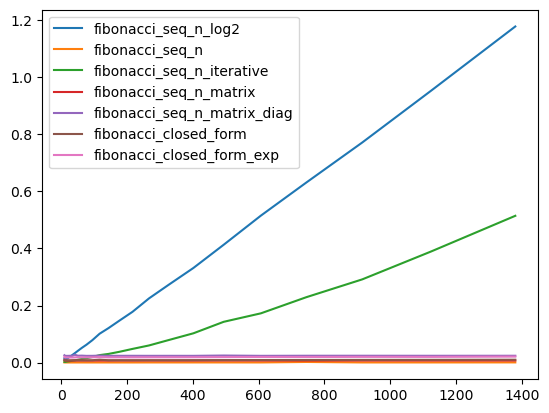

In [192]:
fns = fibonacci_seq_n_log2,fibonacci_seq_n, fibonacci_seq_n_iterative,fibonacci_seq_n_matrix,\
                    fibonacci_seq_n_matrix_diag,fibonacci_closed_form,fibonacci_closed_form_exp

# 1400 is about the most closed form function can take np.log10(1400)=3.14
# Try phi**1500
log_lb,log_ub,iters,num_pts= 1,3.14,10_000,25

results,n_array =timings(fns, log_lb=log_lb,log_ub=log_ub,iters=iters,num_pts=num_pts)
plot_timings (results,n_array,fns,legend_loc="upper left")

Let's eliminate the outliers and rerun this:

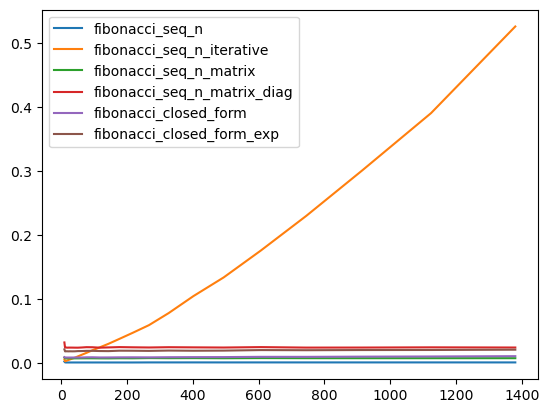

In [193]:
fns = fibonacci_seq_n, fibonacci_seq_n_iterative,fibonacci_seq_n_matrix,\
                    fibonacci_seq_n_matrix_diag,fibonacci_closed_form,fibonacci_closed_form_exp

# 1400 is about the most closed form function can take np.log10(1400)=3.14
# Try phi**1500
log_lb,log_ub,iters,num_pts= 1,3.14,10_000,25

results,n_array =timings(fns, log_lb=log_lb,log_ub=log_ub,iters=iters,num_pts=num_pts)
plot_timings (results,n_array,fns,legend_loc="upper left")

The functions `fibonacci_seq_n_iterative` is still ill-behaved with respect
to the others. 

For better visual resolution, remove that outlier as well:

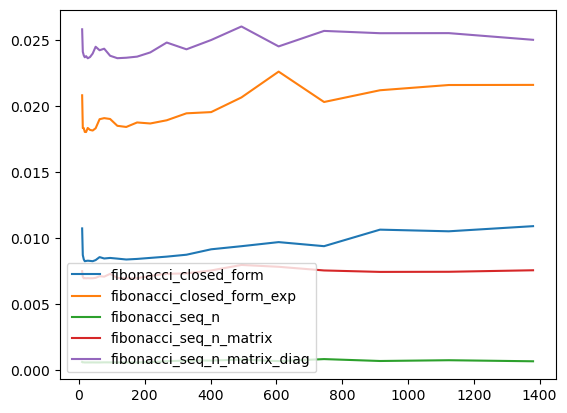

In [195]:
fns = fibonacci_closed_form,fibonacci_closed_form_exp, fibonacci_seq_n, fibonacci_seq_n_matrix,\
      fibonacci_seq_n_matrix_diag

results,n_array =timings(fns, log_lb=log_lb,log_ub=log_ub,iters=iters,num_pts=num_pts)
plot_timings (results,n_array,fns,legend_loc="lower left")

In [196]:
for f in fns:
    print(f.__name__)
results[-1,:]

fibonacci_closed_form
fibonacci_closed_form_exp
fibonacci_seq_n
fibonacci_seq_n_matrix
fibonacci_seq_n_matrix_diag


array([0.01088042, 0.02158379, 0.00064221, 0.00753804, 0.025     ])

Align the the two sequences by enumeration:

In [197]:
for (i,f) in enumerate(fns):
    print(f"{f.__name__:<30} {results[-1,i]:.5f}")

fibonacci_closed_form          0.01088
fibonacci_closed_form_exp      0.02158
fibonacci_seq_n                0.00064
fibonacci_seq_n_matrix         0.00754
fibonacci_seq_n_matrix_diag    0.02500


Align by zipping and sort by time:

In [198]:
timing_results = list(zip((fn.__name__ for fn in fns),results[-1,:]))
print(f"Timing_results for {n=}")
timing_results.sort(key=lambda x: x[1])
for (f,t) in timing_results:
    print(f"{f:<30} {t:.5f}")

Timing_results for n=500
fibonacci_seq_n                0.00064
fibonacci_seq_n_matrix         0.00754
fibonacci_closed_form          0.01088
fibonacci_closed_form_exp      0.02158
fibonacci_seq_n_matrix_diag    0.02500


## Accuracy results for closed form function

Restating what was said in the introduction:  The closed form computation is inaccurate
for larger values of n; all the others using some sort of iteration of addition on integers are accurate.

Here's the code to test your own version

In [875]:
for n in range(20,99):
    v1 = fibonacci_closed_form_float_issues(n) 
    v2 = fibonacci_seq_n (n)
    if (v1 != v2):
        print(f"{n}")
        print(f"Closed form: {v1:,}")
        print(f"Accurate:    {v2:,}")
        break

72
Closed form: 498,454,011,879,265
Accurate:    498,454,011,879,264


In [876]:
n=100
v1 = fibonacci_closed_form_float_issues(n) 
v2 = fibonacci_seq_n (n)
print(f"{n}")
print(f"Closed form: {v1:,}")
print(f"Accurate     {v2:,}")

100
Closed form: 354,224,848,179,263,111,168
Accurate     354,224,848,179,261,915,075


## The matrix calculation of Fibonacci numbers

We implement the idea that the Fibonacci update on a vector of two integers is a Linear Map with an associated matrix.  This matrix powers approach to computing is discussed in a number of places.  It's describe don the Fibonacci Sequence Wikipedia page.  I first read through it in 
[Fabian Dablander's blog post}.](https://fabiandablander.com/r/Fibonacci.html) 

Here's a quick demo.  We'll show how it works and then how we chose the matrix `fib_M` below.

In [232]:
fib_M = np.array([[1,1],
                  [1,0]])

$\text{F}_n$ is found by applying `fib_M` repeatedly to an initial Fibonacci pair vector.

In [233]:
init = np.array([1,0])

We now calculate $\text{F}_{12}$ which rerquires calculating all $\text{F}_{n}$ up through $\text{F}_{12}$:

In [235]:
vec = init
print(" n+1    n    v[0]  v[1]  ")
for i in range(13):
    print(f" {i+1:>2}    {i:>2}   {vec[0]: >3}   {vec[1]: >3} ")
    vec = fib_M@vec

 n+1    n    v[0]  v[1]  
  1     0     1     0 
  2     1     1     1 
  3     2     2     1 
  4     3     3     2 
  5     4     5     3 
  6     5     8     5 
  7     6    13     8 
  8     7    21    13 
  9     8    34    21 
 10     9    55    34 
 11    10    89    55 
 12    11   144    89 
 13    12   233   144 


So finding the 12th Fibonacci number amounts to taking the matrix product of `fib_M`${}^{12}$ with
$\left (\begin{array}{c}1\\0\end{array}\right )$:


In [236]:
init = np.array([1,0])
np.linalg.matrix_power(fib_M,12)@init

array([233, 144])

Note we **don't** do this

In [234]:
(fib_M**12)@init

array([1, 1])

Because `fib_M**12` is

In [235]:
(fib_M**12)

array([[1, 1],
       [1, 0]])

This is just elementwise power-raising or elementwise multiplication 12 times. Elementwise power-raising  is this:

$$
\prod_{i=1}^{12} \left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}
\right \rbrack
= \underbrace{\left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}
\right \rbrack \times
\left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}
\right \rbrack \times \dots
\left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}
\right \rbrack}_{\text{12 times}}
= 
\left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array} \right \rbrack
$$

Instead we do
$$
\text{np.linalg.matrix_power}\left ( \left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}
\right \rbrack,
12 \right )
= \underbrace{\left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}
\right \rbrack @
\left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}
\right \rbrack @ \dots
\left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}
\right \rbrack}_{\text{12 times}}
= 
\left \lbrack
\begin{array}{cc}
233 & 144\\
144 & 89
\end{array} \right \rbrack
$$



Matrix multiplication

$$
= \underbrace{
\left \lbrack
\begin{array}{cc}
a & b\\
c & d
\end{array}
\right \rbrack  @ 
\left ( \begin{array}{c} x \\ y \end{array} \right )}_{\text{Python}}
=
\left \lbrack
\begin{array}{cc}
a & b\\
c & d
\end{array}
\right \rbrack
\left ( \begin{array}{c} x \\ y \end{array} \right )
=
\left ( \begin{array}{c} x' \\ y' \end{array} \right )
=
\left ( \begin{array}{c} a\cdot x \,+\, b\cdot y \\ c\cdot x \,+\, d\cdot y \end{array} \right )
$$

If you're unfamiliar with matrix multiplication, it's useful to think of it as applying the coefficients
in a pair of equations defining the coordinates of the vector output by a **linear map**. So we see
the matrix multiplication above as implementing the map defined by the equations:

$$
%\left \lbrack
\begin{array}{ccccc}
a \cdot x & + & b \cdot y & = & x'\\
c \cdot x & + & d \cdot y & = & y'
\end{array}
%\right \rbrack  
%=
%\left ( 
%\begin{array}{c} x' \\ y' \end{array}
%\right )
$$

So:

$$
\left \lbrack
\begin{array}{cc}
a & b\\
c & d
\end{array}
\right \rbrack
\left ( \begin{array}{c} x \\ y \end{array} \right )
\text{ corresponds to }
\left ( \begin{array}{c} x \\ y \end{array} \right ) \mapsto 
\left ( \begin{array}{c}  a \cdot x & + & b \cdot y \\ c \cdot x & + & d \cdot y  \end{array} \right )
$$

Returning to the contrast with elementwise mutliplication:

In [226]:
fib_M*fib_M

array([[1, 1],
       [1, 0]])

In [225]:
fib_M@fib_M

array([[2, 1],
       [1, 1]])

How we discover fib_M: The linear transformation for the Fibonacci Sequence is


$$
T \left ( \begin{array}{c} a\\b \end{array} \right ) =  \left ( \begin{array}{c} a+b\\ a \end{array} \right )
$$
It follows that (see Dablander's blog for a detailed proof) that

$$
 T ^{n}\left ( \begin{array}{c} 1\\0 \end{array} \right ) =
 \left ( \begin{array}{c} \text{F}_{n+1}\\ \text{F}_{n} \end{array} \right ).
$$


We now want to find the matrix for T.  We define the two columns of the matrix for T,
which we'll call `fib_M`, by looking at the values of T `(0,1)` and `(1,0)`.  

By the definition of T

$$
T\left(\,\left\lbrack \begin{array}{c}1\\0\end{array}\right \rbrack\,\right ) = \left\lbrack \begin{array}{c}1+0\\1\end{array}\right \rbrack = \left\lbrack \begin{array}{c}1\\1\end{array}\right \rbrack 
$$



and 

$$
T\left(\,\left\lbrack \begin{array}{c}0\\1\end{array}\right \rbrack\,\right ) = \left\lbrack \begin{array}{c}1+0\\0\end{array}\right \rbrack = \left\lbrack \begin{array}{c}1\\0\end{array}\right \rbrack. 
$$


By the rules of matrix multiplication

$$
\begin{array}{lcl}
M\left(\,\left\lbrack \begin{array}{c}1\\0\end{array}\right \rbrack\,\right ) &=& \text{ the first column of M }\\
M\left(\,\left\lbrack \begin{array}{c}0\\1\end{array}\right \rbrack\,\right ) &=& \text{ the second column of M }
\end{array}
$$

So

$$
\text{fib_M} = 
\left \lbrack \begin{array}{lcl}
1 & 1\\
1 & 0
\end{array} \right \rbrack.
$$

In [165]:
fib_M

array([[1, 1],
       [1, 0]])

Confirming Python agrees with us:

In [163]:
# Col 1 of fib_M. The result dictated by the definition of T
fib_M@(np.array([1,0]))

array([1, 1])

In [164]:
#Col 2 of fib_M
fib_M@(np.array([0,1]))

array([1, 0])

So Fibonacci calculations become

$$
\left (
\begin{array}{c}
\text{F}_{n+1}\\
\text{F}_{n}\\
\end{array}
\right )
=
\left (
\left \lbrack
\begin{array}{c}
1 & 1\\
1 & 0
\end{array}
\right \rbrack
\right)^{n}
\left (
\begin{array}{c}
0\\
1
\end{array}
\right )
$$

Actually we don't really need an initial vector, though it's convenient presentationally (for discussing the diagonalization computation to come).  Just taking powers of the inital matrix will get you
Fibonacci numbers;

In [238]:
np.linalg.matrix_power(fib_M,12)

array([[233, 144],
       [144,  89]])

So 

$$
\text{fib_M}^n = 
\left \lbrack \begin{array}{cc}
1 & 1\\
1 & 0
\end{array}\right \rbrack ^{n} =
\left \lbrack \begin{array}{cc}
F_{n+1} & F_{n}\\
F_{n} & F_{n-1}
\end{array}\right \rbrack
$$

Not the least of the virtues of the matrix is that it provides a new recursion relation for computing $F_n$.  From the fact that, for square matrices, $A^{m+n} = A^{m}A^{n}$, we have:

$$
\begin{array}{lcl}
\left \lbrack \begin{array}{cc}
1 & 1\\
1 & 0
\end{array}\right \rbrack  ^{m+n}
&
=&
\left \lbrack \begin{array}{cc}
1 & 1\\
1 & 0
\end{array}\right \rbrack  ^{m}
\left \lbrack \begin{array}{cc}
1 & 1\\
1 & 0
\end{array}\right \rbrack  ^{n}\\
\left \lbrack
\begin{array}{ll}
\text{F}_{m+n+1} & \text{F}_{m+n}\\
\text{F}_{m+n} & \text{F}_{m+n-1}
\end{array}
\right \rbrack
& = &
\left \lbrack
\begin{array}{ll}
\text{F}_{m+1} & \text{F}_{m}\\
\text{F}_{m} & \text{F}_{m-1}
\end{array}
\right \rbrack
\left \lbrack
\begin{array}{ll}
\text{F}_{n+1} & \text{F}_{n}\\
\text{F}_{n} & \text{F}_{n-1}
\end{array}
\right \rbrack
\end{array}
$$

And so we have

$$
\left \lbrack
\begin{array}{cc}
(a) & (b)\\
\text{F}_{m+n+1} & \text{F}_{m+n}\\
\text{F}_{m+n} & \text{F}_{m+n-1}\\
(c) & (d)
\end{array}
\right \rbrack
=
\left \lbrack
\begin{array}{ll}
\text{F}_{m+1} & \text{F}_{m}\\
\text{F}_{m} & \text{F}_{m-1}
\end{array}
\right \rbrack
\left \lbrack
\begin{array}{ll}
\text{F}_{n+1} & \text{F}_{n}\\
\text{F}_{n} & \text{F}_{n-1}
\end{array}
\right \rbrack
=
\left \lbrack
\begin{array}{cc}
(a) & (b)\\
\text{F}_{m+1}\text{F}_{n+1} + \text{F}_{m}\text{F}_{n} & 
   \text{F}_{m+1}\text{F}_{n} + \text{F}_{m}\text{F}_{n-1} \\
   \text{F}_{m}\text{F}_{n+1} + \text{F}_{m-1}\text{F}_{n} 
    &  \text{F}_{m}\text{F}_{n} + \text{F}_{m-1}\text{F}_{n-1} \\
    (c) & (d)
\end{array}
\right\rbrack
$$

We have equality between the matrix entries on the left and the corresponding entries on the right, so
using the entries labeled (c) and (d) we have:

$$
\begin{array}{lcl}
\text{F}_{m+n} &=& \text{F}_{m}\text{F}_{n+1} + \text{F}_{m-1}\text{F}_{n}\\
\text{F}_{m+n-1} &=& \text{F}_{m}\text{F}_{n} + \text{F}_{m-1}\text{F}_{n-1}\\
\end{array}
$$

For the case where $m=n$ this gives:

$$
\begin{array}{lcl}
\text{F}_{2n} &=& \text{F}_{n}\text{F}_{n+1} + \text{F}_{n-1}\text{F}_{n}\\
              &=& F_{n}\left \lbrack \,\text{F}_{n+1} + \text{F}_{n-1} \,\right\rbrack\\
              &=& F_{n}\left \lbrack \,\text{F}_{n} + 2\,\text{F}_{n-1} \,\right\rbrack\\
 \text{F}_{2n-1} &=& \left(\text{F}_{n} \right )^{\,2} + \left (\text{F}_{n-1} \right )^{\,2}\\
\end{array}
$$

This recursion relation licenses a recursive function where the number of arithmetic calculations
is hugely reduced, in fact, from Order $2^{n}$ to Order $\log n$. 
We saw there are $2^{32}$ arithmetic computations in computing $\text{F}_{32}$,
when we expanded its computation tree above.  
On the other hand, using this new recursion relation, we can define 
 $\text{F}_{32}$ directly in terms of $\text{F}_{16}$ and $\text{F}_{15}$, shortening its
 recursion tree, because $\text{F}_{16}$ and  $\text{F}_{15}$ both turn 
 into computations involving $\text{F}_{8}$ and $\text{F}_{7}$, and so on.
 
Here is a computation tree for n=30, which may be compared
with exponential computation tree we saw above for naive recursion (`fibonacci_seq_n`); the $\log_{2} n$ algorithm
tree for $n=30$ is shallower than naive algorithm tree for $n=7$. 

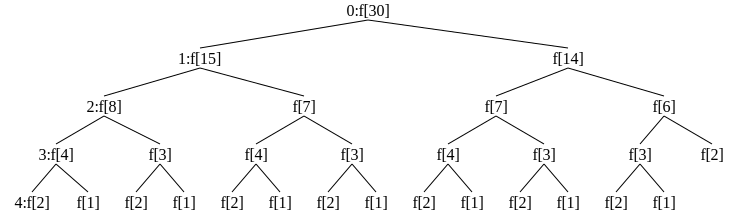

In [2]:
# Note for this to work svgling must be installed (`! pip install svgling`) in addition to nltk
from nltk.tree import Tree
t = Tree.fromstring("(0:f[30] (1:f[15] (2:f[8] (3:f[4] 4:f[2] f[1]) (f[3] f[2] f[1]))"
                    "(f[7] (f[4] f[2] f[1]) (f[3] f[2] f[1]))) (f[14] (f[7] (f[4] f[2] f[1]) (f[3] f[2] f[1]))"
                    "(f[6] (f[3] f[2] f[1]) f[2])))")
t

Since this is a cousin of
the simple recursive algorithm, implemented as `fibonacci_seq_n`,  we have named the function
implementing this algorithm `fibonacci_seq_n_log2`. 

The next step up the efficiency ladder is to use the diagonalized version of the Fibonacci Matrix because  the nth power of a diagonal matrix is particularly easy to compute

$$
\left\lbrack
\begin{array}{cc}
a  & 0 \\
0  & b
\end{array}
\right\rbrack ^{n} 
=
\left\lbrack
\begin{array}{cc}
a^n  & 0 \\
0  & b^n
\end{array}
\right\rbrack
$$

We get to the diagonal form of a matrix by factoring it into three other matrices,
one of which is diagonal; it turns out that, in this factored form, computing the nth power of the original matrix 
is equivalent to just taking the nth power of the diagonal matrix.
Schematically, this works as follows:

$$
\begin{array}{llcl}
&
\left\lbrack
\begin{array}{cc}
1 & 1 \\
1  & 0
\end{array}
\right\rbrack &= &
\text{E}
\left\lbrack
\begin{array}{cc}
\lambda_{1} & 0 \\
0  & \lambda_{2}
\end{array}
\right\rbrack
\text{E}^{-1}\\
&
\left\lbrack
\begin{array}{cc}
1 & 1 \\
1  & 0
\end{array}
\right\rbrack^{n} &=&
\text{E}
\left\lbrack
\begin{array}{cc}
\lambda_{1}^{n} & 0 \\
0  & \lambda_{2}^{n}
\end{array}
\right\rbrack
\text{E}^{-1}
\end{array}
$$

The factoring on the first line is called the **Eigendecomposition**  of the matrix.
The $\lambda$s in the diagonal matrix are
called **eigenvalues** of `fib_M`.  A full description of the idea takes up much of a Linear Algebra text, but essentially what we're doing is a change of coordinates or a change of axes to  certain
vectors associated with M called its **eigenvectors**.  Reading from right to left, the three matrices in the decomposition work as follows: the first changes the basis to eigenvector coordinates (that's $\text{E}^{-1}$),; 
the second dilates in the directions of the  new axes (that's  the diagonal matrix); the third changes back from the eigenvector basis to the standard basis (that's $\text{E}$).

Why are we doing this again?  Well there are actually many applications of this decomposition,
but for our purposes, the point is the second line. If D is the diagonal matrix,it's easy to show that
$M^{n}$ is $\text{E}D^{n}\text{E}^{-1}$.    Applying this to the task of computing the nth Fiboncci number,
using the `Fib_m` matrix, we get:

$$
\begin{array}{llcl}
(1) &
\left (
\begin{array}{c}
\text{F}_{n+1}\\
\text{F}_{n}\\
\end{array}
\right )
&=&
\left (
\left \lbrack
\begin{array}{c}
1 & 1\\
1 & 0
\end{array}
\right \rbrack
\right)^{n}
\left (
\begin{array}{c}
0\\
1
\end{array}
\right ) \\
& & = &
\text{E}
\left\lbrack
\begin{array}{cc}
\lambda_{1}^{n} & 0 \\
0  & \lambda_{2}^{n}
\end{array}
\right\rbrack
\text{E}^{-1}
\left (
\begin{array}{c}
0\\
1
\end{array}
\right )
\\
\end{array}
$$

So with one change of basis and one inverse change 
of basis, finding the nth Fibonacci number becomes very easy.

But it's actually much better than that.  Because this matrix  computation leads to a closed form solution to the problem of computing the nth Fibonacci number ($\text{F}_{n}$).  No more recursion or iteration needed.  We have defined a function using the closed form definition (`fibonacci_closed_form`) along with other 
ways of computing the nth Fibonacci number in a code cell above.   The derivation of this form is given in the appendix, but the elements of the derivation have already been given.  If you know some Linear Algebra, you may want to try working out the details on your own. Use equation (1). You will need to find the eigenvalues and eigenvectors of `Fib_M` (because the diagonal matrix contains the eigenvalues and E contains the eigenvectors), and use E to find $\text{E}^{-1}$.  The hardest part is finding  $\text{E}^{-1}$, since you will lose an important numerical relationship if you just call `numpy.linalg.inv`. Instead you will have to use the formula for inverses from a Linear Textbook. If

$$
\text{E} = \left\lbrack 
\begin{array}{cc}
a & b \\
c  & d
\end{array}
\right \rbrack
$$

then
$$
\text{E}^{-1} = 
\frac{1}{\Delta}
\left\lbrack 
\begin{array}{cc}
d & -b \\
-c & a
\end{array}
\right\rbrack,
$$

where $\Delta$ is the so-called **determinant** of E, $ad - bc$.

You can check your results by
looking at `fibonacci_closed_form` in the code cell above.

Let's close this discussion by  sketching the proof of something we noted 
above that the ratio $\text{F}_{n+1}/\text{F}_{n}$ converges
on $\phi$.

First, if we use standard methods to compute the eigenvalues of `fib_M` (see
Fabian's blog for the steps), we discover they are 

$$
\lambda_{1} = \frac{1 + \sqrt{5}}{2} \text{ and } \lambda_{2} = \frac{1 - \sqrt{5}}{2}
$$

and  one of these, of course, is our old friends $\phi$ and the other is $1 - \phi$,
which also $-\phi^{-1}$ (recall that $\phi = 1 + \phi^{-1}$).
This is fairly astonishing if you stop to think about it.  

It's also useful.  Using this first eigenvalue we can find the first eigenvector
and that will help us prove that the ratio of the terms in the Fibonacci
Sequence approaches $\phi$.

To find the eigenvector 

$$
\left(
\begin{array}{c}
a\\
b
\end{array}
\right )
$$

corresponding to eigenvalue $\phi$ of `fib_M`, we start with the following:

$$
\left\lbrack
\begin{array}{cc}
1 & 1 \\
1  & 0
\end{array}
\right\rbrack 
\left(
\begin{array}{c}
a\\
b
\end{array}
\right )
=
\left(
\begin{array}{c}
\phi \, a\\
\phi \, b
\end{array}
\right )
$$
since by definition an eigenvector of `fib_M`
with eigenvalue $\phi$
is a vector whose direction is unchanged by multiplication
with `fib_M`, but which is dilated or shrunk by a factor
of $\phi$.

We only need to consider the computation of the second component $\phi\,b$:
From the definition of matrix multiplication we know

$$
\begin{array}{lcl}
\phi b & = & a \\
\end{array}
$$

Hence, the ratio of $a$ to $b$ must be $\phi$,
so the eigenvectors for this eigenvalue must all be scalar multiples of 

$$
\left (
\begin{array}{c}
\phi\\
1
\end{array}
\right ).
$$

Now the fact that the first eigenvector has the form

$$
\left(
\begin{array}{cc}
\phi\\
1\\
\end{array}
\right )
$$

leads directly to the conclusion
that the ratio of $\text{Fib}_{n+1}$ to $\text{Fib}_{n}$  converges to $\phi$.

The key connection is provided by a Linear Algebra theorem about matrix powers which says that for any square matrix M with first (or dominant) eigenvector $e_{1}$ and any arbitrary vector $v$,  

$$
\begin{array}{c}
\text{Powers Theorem}\\
\lim_{n\to \infty} \text{M}^{n}v = ke_{1},
\end{array}
$$

where $e_{1}$ is the first eigenvector (paired with the eigenvalue of largest magnitude) and $k$ is a scalar. That is, for large powers of $n$, $\text{M}^{n}v$ approaches the first eigenvector.
This is the basis for the powers method of computing the first eigenvector of
a matrix.  The proof is quite simple and is sketched out in an Appendix to this notebook.

Applying this to our matrix, `fib_M` and our initial Fibonacci vector 

$\left (
\begin{array}{c}
1\\
0
\end{array}
\right )$,
we have 

$$
\begin{array}{lcl}
\text{fib_M}^{n}
\left (
\begin{array}{c}
1\\
0
\end{array}
\right ) &=&
\left (
\begin{array}{l}
\text{F}_{n+1}\\
\text{F}_{n}
\end{array}
\right )\\
%\begin{array}{l}
%\lim_{n\to \infty}
\lim\limits_{n \to \infty}
\text{fib_M}^{n}
\left (
\begin{array}{c}
1\\
0
\end{array}
\right ) & = &
k\left (
\begin{array}{c}
\phi\\
1
\end{array}
\right )\\
%\lim_{n\to \infty} 
\lim\limits_{n \to \infty}
%\text{fib_M}^{n}
%\left (
%\begin{array}{c}
%0\\
%1
%\end{array}
%\right )
\left (
\begin{array}{l}
\text{F}_{n+1}\\
\text{F}_{n}
\end{array}
\right )
&=& k\left (
\begin{array}{c}
\phi\\
1
\end{array}
\right )
\end{array}
$$

so if  $(\phi,\,1)$ is the first eigenvector, then the limit of the ratio $\text{F}_{n+1}/\text{F}_{n}$
must be $\phi$.  

This is as good a time as any to say that I heartily endorse what blogger Fabian says: If you want a better understanding of what eigenvectors are, see [3blue1brown's video on eigenvectors.](https://www.3blue1brown.com/lessons/eigenvalues)

Python computation of eigenvalues and eigenvectors. First eigenvector is the first column of the eigenvector matrix.

In [207]:
eig_struc = np.linalg.eig(fib_M)
eigvals= eig_struc.eigenvalues
print(eigvals[0])
eig1 = eig_struc.eigenvectors[:,0]
eig1

1.618033988749895


array([0.85065081, 0.52573111])

The eigenvector `eig1` is a scalar multiple of  $\left ( \begin{array}{c}\phi\\1\end{array} \right )$.  Just divide both components by the second:

In [209]:
(1/eig1[1])*eig1

array([1.61803399, 1.        ])

## Exercise

### Introduction

As we saw at the outset, $\phi$ is the $x$ such that $x = 1 + 1/x$.  That is,

$$
(1)\, \phi^{1} = \phi^{0} + \phi^{-1}.
$$

From this it follows that for any $n$ (including negative or irrational $n$):

$$
(2)\, \phi^{n} = \phi^{n-1} + \phi^{n - 2}
$$

For any particular $n$,we derive the version of (2) that has $\phi^{n}$ on the
left hand side simply by multiplying both sides of (1) by $\phi^{n-1}$.
For example, if $n=3$, we multiply both sides of (1) by $\phi^{2}$ to get:

$$
\phi^{3} = \phi^{2} + \phi^{1}
$$


What (2) tells us, then, is that taking a power of $\phi$ may be reduced to addition:

The first function in the cell below takes advantage of this
relation to define an iterative function that computes 
positive integer powers of $\phi$.

For any non-negative integer `n`, `phi_pow_iterative(n)`
returns exactly the same result as $\phi^n$ or in Python
`phi**n`.  Notice how much the definition of `phi_pow_iterative(n)`
resembles the definition of `fibonacci_seq_n_iterative`.

In [879]:
def phi_pow_iterative(n):
    """
    Iterative implementation of phi**n using the Fibonacci-like recurrence relation.
    
    phi^n = phi^{n-1}  + phi^{n-2}
    
    For example 
    
    phi**2 = 1 + phi = phi**0 + phi**1
    phi**3 = phi**2 + phi 
    phi**4 = phi**3 + phi**2
    ....
    """
    assert n >= 0,"Use only nonnegative n"
    if n == 0:
        return 1
    elif n == 1:
        return phi
    else:
        #  Keep around the last two terms
        #  because you're going to add them to get
        #  the next one
        res = [1,phi]
        for i in range (n-1):
            res = [res[1], res[0]+res[1]]
            #res = res[1:] + [sum(res)]
        return res[1]
    


To check our claim that for any non-negative integer `n`, `phi_pow_iterative(n)` 
returns exactly the same result as $\phi^n$, let's try `n=12`:

In [881]:
# phi is a name defined earlier in the notebook and which should be defoned when youi
# do this exercise.
phi**12

321.996894379985

And our phi functions return:

In [882]:
phi_pow_iterative(12)

321.99689437998484

Demonstrations of what's discussed below:

In [888]:
phi**(3),2*phi+1

(4.23606797749979, 4.23606797749979)

In [892]:
phi**(4), 3*phi+2

(6.854101966249686, 6.854101966249685)

In [894]:
phi**(5),5*phi+3

(11.090169943749476, 11.090169943749475)

###  What to do

Your assignment  is to write two functions. 

1.  First, write a recursive version 
of `phi_pow_iterative(n)`. Call it `phi_pow_recursive(n)`.  You should consult  `phi_pow_iterative(n)` to help
you decide how to formulate it, and you might also find it useful
to look at `fibonacci_seq_n`  defined earlier in the notebook. That
is a recursive definition of `fibonacci_seq_n_iterative`.

2.  Write another function (call it `phi_pow`) that for any $n$, returns the same value
as  `phi_pow_iterative(n)` and `phi_pow_recursive(n)` but is neither iterative nor
recursive.  Instead your function  should take advantage of the following
regularity, noted when we first introduced $\phi$:

    $$
\begin{array}{lclclcrl}
\phi^1 & &                &  &                    &=& \phi\\
\phi^2& &                 &  &                    &=&  \, \phi + 1 \\
\phi^3 &=& \phi^2 +\phi  &=& (\phi + 1) + \phi &=& 2\,\phi + 1\\
\phi^4 &=& \phi^3 + \phi^2 && & =& 3\,\phi + 2 &\\
\phi^5 &=& \phi^4 + \phi^3 && &= & 5\,\phi + 3 &\\
\end{array}
    $$

    That is, for any positive integer `n`, $\phi^{n}$ can be expressed in the form

    $$
\phi^{n} = j\phi  + k
    $$

    where `j` and `k` are  positive integers depending on `n`.  For example, when `n` is 5, `j` is 5 and `k` is 3.  The examples shown above should make it clear that when `n` is 6, `j` is 8 and `k` is 5.

1. Your function `phi_pow(n)` should return the same value as  $\phi^{n}$, but you should at least test it for `n=1` `n=2` and `n=12`.  
2. I am going to test your function on some unknown higher value of `n`, so you won't get full credit for simply precomputing the values `i` and `j` necessary for `n=1,n=2, ... n=12`. In fact, if you do that, you won't get any credit.
2.  Your answer shouldn't call `phi_pow_iterative(n)` or `phi_pow_recursive(n)` and it shouldn't incorporate any code from those functions or any functions you import from another module. A good rule of thumb: if you follow the hints in the instructions,  computing `phi_pow(12)` shouldn't involve computing `phi_pow(11)` or `phi_pow(10)`.
3.  **Hint**  A function defined elsewhere in this notebook may be of use, although you will get full credit if you compute $i$ and $j$ with your own code.

In [735]:

def phi_pow_recursive(n):
    """
    Iterative implementation of phi**n using the Fibonacci-like recurrence relation.
    
    phi^n = phi^{n-1}  + phi^{n-2}
    
    For example 
    
    phi**2 = 1 + phi = phi**0 + phi**1
    phi**3 = phi**2 + phi 
    phi**4 = phi**3 + phi**2
    ....
    """
    assert n >= 0,"Use only nonnegative n"
    if n == 0:
        return 1
    elif n == 1:
        return phi
    else:
        return phi_pow_recursive(n-2) + phi_pow_recursive(n-1)

    
def phi_pow (n):
    """
    Non-iterative implementation of phi**n using the recurrence relation
    
    phi^n = phi^{n-2}  + phi^{n-1}
    
    For example 
    
    phi**2                                   =   phi + 1
    phi**3 = phi + phi**2  = phi + (phi + 1) = 2*phi + 1
    phi**4 = phi**2 + phi**3                 = 3*phi + 2 (add the two expressions above)
    phi**5 = phi**3 + phi**4                 = 5*phi + 3 (add the two expressions above)
    ....
    phi**n = Fib_{n-1} * phi + Fib_{n-2}
    
    where Fib_i is the ith term in the Fib sequence
    """
    if n == 0:
        return 1
    elif n== 1:
        return phi
    else:
        #  Note phi_pow isnt recursive because it  doesnt call phi_pow
        #  Rather phi_pow has been reduced to a computation involving
        #  fibonacci_seq_n. Multiplication (taking a power)  has been reduced to addition.
        return fibonacci_seq_n(n)*phi + fibonacci_seq_n(n-1) 

## Appendix

### Deriving the closed form (See [Fabian Dablander's blog](https://fabiandablander.com/r/Fibonacci.html) )

To derive a closed form for $\text{Fib}_{n}$, we must spell out the change of basis 
matrixes $\text{E}$ and $\text{E}^{-1}$ used in (1).
Start with E, which must map from the eigenvector basis
to the standard basis.  To find the matrix expressing the linear map, 
we  ask  what does E map  $\left ( \begin{array}{c} 1 \\ 0\end{array} \right )$
and $\left ( \begin{array}{c} 0 \\ 1\end{array} \right )$ to?
Since the basis we are changing to is the eigenvector basis,
the linear combinations encoded by coordinates $\left ( \begin{array}{c} 1 \\ 0\end{array} \right )$   and $\left ( \begin{array}{c} 0 \\ 1\end{array} \right )$  are

$$
\begin{array}{lcl}
1 \cdot e_{1} + 0\cdot e{2}
& = & e_{1}\\
0 \cdot e_{1} + 1 \cdot e_{2} & = & e_{2}
\end{array},
$$

where $e_{1}$ and $e_{2}$ are the first and second eigenvectors; so to specify E we know we need both eigenvectors.
We found the first eigenvector above.

Using the same method for the second eigenvalue, we get

$$
\begin{array}{lcl}
(-\phi^{-1}) \,b & = & a
\end{array}
$$

The first equation tells us that in this case the ratio of $a$ to $b$ must be $-\phi^{-1}$,
so the eigenvectors for this eigenvalue must all be scalar multiples of 

$$
\left (
\begin{array}{c}
-\phi^{-1} \\
1
\end{array}
\right )
$$

So now we know

$$
\begin{array}{llcl}
\text{E}:& \left ( \begin{array}{c} 1 \\ 0\end{array} \right ) &\mapsto &
\left ( \begin{array}{c}\phi \\ 1 \end{array} \right )\\
\text{E}: & \left ( \begin{array}{c} 0 \\ 1\end{array} \right ) & \mapsto &
\left ( \begin{array}{c} -\phi^{-1}\\ 1 \end{array} \right )
\end{array}
$$

The only matrix that does this is 
$$
\text{E} =
\left\lbrack
\begin{array}{cc}
\phi & -\phi^{-1}\\
1 & 1 \\
\end{array}
\right\rbrack
$$

To use the diagonal matrix, we also need $\text{E}^{-1}$, the matrix that maps from standard basis coordinates to
coordinates in the eigenvector basis.  Not every matrix has an inverse but a valid change of basis matrix will, and
when the matrix exists, we can use 
the standard Linear Algebra formula cited above to find it;

$$
\text{E} = \left\lbrack 
\begin{array}{cc}
a & b \\
c  & d
\end{array}
\right \rbrack
$$

implies 

$$
\text{E}^{-1} = 
\frac{1}{\Delta}
\left\lbrack 
\begin{array}{cc}
d & -b \\
-c & a
\end{array}
\right\rbrack,
$$

where $\Delta$ is the determinant of E, $ad - bc$.


Applying this to E, we have:


$$
\text{E}^{-1} =
\frac{-1}{\sqrt{5}}
\left\lbrack
\begin{array}{cc}
1&\phi^{-1} \\
-1 & \phi 
\end{array}
\right\rbrack
$$

That is, the determinant $\Delta$ of $\text{E}$, $ad - bc$, is $- \sqrt{5}$.  Working through that:


$$
\text{det}(E) = ad-bc = \lbrack \phi\cdot 1 \rbrack - \lbrack1\cdot -\phi^{-1} \rbrack = \phi - (1 - \phi) = (2\phi-1),
$$

since $-\phi^{-1} = (1 - \phi)$.

Recalling that

$$
\phi = \frac{1 + \sqrt{5}}{2}
$$


we have

$$
\begin{array}{lcl}
2\phi -1  &=& 2 \frac{1 + \sqrt{5}}{2} - 1\\
               &=& \frac{2 + 2 \sqrt{5} -2}{2}\\
               &=& \sqrt{5}
               \end{array}
$$

You can also do this step by finding the inverse in Python:

In [12]:
E = np.array([[phi, -phi**(-1)],
              [1,           1]
              ])
((a,b),(c,d))= E
E_inv =np.linalg.inv(E)
E_inv

array([[ 0.4472136,  0.2763932],
       [-0.4472136,  0.7236068]])

But then you have to multiply $\Delta$ (the determinant, $=\sqrt{5}$) back in to 
let you see that $\phi$, $-\phi^{-1}$,-1, and 1 are all in there, which
is what lets the simplifications go forward.

In [13]:
E_inv* (np.linalg.det(E))

array([[ 1.        ,  0.61803399],
       [-1.        ,  1.61803399]])

In [14]:
np.array([[d, -b], [-c,  a]])

array([[ 1.        ,  0.61803399],
       [-1.        ,  1.61803399]])

And it's okay to use  `np.linalg.det(E)` ($\approx 2.236068$) for $\Delta$, without ever calling it $\sqrt{5}$.

In [17]:
np.linalg.det(E),np.sqrt(5)

(2.23606797749979, 2.23606797749979)

We can now use  (1) to write an expression for
the nth Fibonacci vector:

$$
\begin{array}{lclccc}
\left(
\begin{array}{c}
\text{F}_{n+1}\\
\text{F}_{n}
\end{array}
\right )
& = &
\left (
\left\lbrack
\begin{array}{cc}
1 & 1 \\
1  & 0
\end{array}
\right\rbrack
\right )^{n} 
\left(
\begin{array}{c}
1\\
0
\end{array}
\right ) \\  %%%%  Begin second line
&=&
\left\lbrack
\begin{array}{cc}
\phi & -\phi^{-1}\\
1 & 1 \\
\end{array}
\right\rbrack
\left\lbrack
\begin{array}{cc}
\phi^{n} & 0 \\
0 & (-\phi^{-1})^{n}
\end{array}
\right\rbrack
\frac{1}{\sqrt{5}}
\left (
\left\lbrack 
\begin{array}{cc}
1 & \phi^{-1} \\
-1 &  \phi
\end{array}
\right\rbrack
\right )
%\left(
%\frac{-1}{\sqrt{5}}
%\left\lbrack
%\begin{array}{cc}
%-\phi^{-1} & -1\\
%-\phi & 1
%\end{array}
%\right\rbrack
%\right )
\left(
\begin{array}{c}
1\\
0
\end{array}
\right )  \\  %%%% Begin third line
& = &
\frac{1}{\sqrt{5}}
\left\lbrack
\begin{array}{cc}
\phi^{n+1} & (-\phi^{-1})^{n+1}\\
\phi^{n} & (-\phi^{-1})^{n}
\end{array}
\right \rbrack
\left (
\begin{array}{c}
-1\\
1
\end{array}
\right )  \\  %%%% Begin fourth line
& = &
\frac{1}{\sqrt{5}}
\left (
\begin{array}{c}
\phi^{n+1} - (-\phi^{-1})^{n+1}\\
\phi^{n} - (-\phi^{-1})^{n}
\end{array}
\right )
\end{array}
$$

From which we see the closed form for $\text{F}_{n}$, known as **Binet's Formula**:

$$
\text{F}_{n} = \frac{1}{\sqrt{5}}(\phi^{n} - (-\phi^{-1})^{n})
$$

It's clear that the second term goes to 0 as $n$ gets large, so for large
$n$,

$$
\text{F}_{n} \approx \frac{1}{\sqrt{5}}\phi^{n},
$$

which leads to another proof that the
ratio of adjacent Fibonacci numbers has $\phi$ as a limit (also cited
in Fabian's blog, as Kepler's proof).  For large $n$:

$$
\frac{\text{F}_{n+1}}{F_{n}} = \frac{\frac{1}{\sqrt{5}}\phi^{n+1}}{\frac{1}{\sqrt{5}}\phi^{n}}
= \frac{\phi^{n+1}}{\phi^{n}} = \phi
$$

In [47]:
psi

-0.6180339887498949

In [50]:
psi,1 + psi**(-1)

(-0.6180339887498949, -0.6180339887498947)

##  Binet's Form:  A more illuminating derivation of Binet's Formula

Above  we followed blogger Fabian's steps in deriving Binet's Formula, a closed form 
calculation of the nth Fibonacci
number.  That proof was quite elegant and used eigenvectors of the Fibonacci matrix.  That's
Linear Algebra, which is not generally considered lofty mathematics, but it's more
than a lot of people have had.  Here I'd like to present an alternative "derivation" which offers
some insight, because it shows the relationship of the closed form to the odd fact
that $\phi^{n}$ has a Fibonacci-like structure ($\phi^{n}$ is the sum of the 
$\phi^{n-1}$ and $\phi^{n-2}$).  It also introduces the number $\sqrt{5}$ in a fairly
transparent way.  In the Linear Algebra derivation, $\sqrt{5}$ makes its appearance
as the determinant of the change of basis matrix E, but like almost all facts involving
determinants, that falls somewhat short of being intuitive.

Here's a slightly disabbreviated form of the "derivation" of Binet's  formula, as prersented on [the Wikipedia page for the Fibonacci Sequence.](https://en.wikipedia.org/wiki/Fibonacci_sequence) You'll see
why I put word *derivation* in scare quotes below. 


First, recall that $\phi = 1 + 1/\phi$,
or more usefully for present purposes,  $\phi^1 = \phi^{-1} + \phi^{0}$, we have  this general Fibonacci-like relation among powers of $\phi$:

$$
\begin{array}{llcl}
(i) & \phi^1 = \phi^0 + \phi^{-1}\\
(ii) & \phi^n = \phi^{n-1} + \phi^{n-2},\\
\end{array}
$$

where (ii) follows from (i) simply by multiplying both sides by $\phi^{n-1}$
Another way of putting this is that $\phi$ satisfies the following equation:

$$
\begin{array}{llcl}
(a) & x^1 &= & x^{0} + x^{-1} \\
\end{array}
$$

Any $x$ that satisfies (a) will also satisfy (b):

$$
\begin{array}{llcl}
   &  \mathbf {Fibonacci }\quad\mathbf{Relation}\\
(b) & x^n &= & x^{n-2} + x^{n-1}\\
\end{array}
$$

Well, there is another $x$ that satisfies (a) (and therefore also satisfies (b)). That is $-\phi^{-1}$
(recall that $-\phi^{-1}$ is the other solution to the equation $x = 1 + 1/x$):

$$
\begin{array}{llcll}
(a') & (-\phi^{-1})^1 &=& (-\phi^{-1})^{0} + (-\phi^{-1})^{-1} \\
    &  -\phi^{-1}    &=& 1 + -\phi \\
(b') & (-\phi^{-1})^n &= &(-\phi^{-1})^{n-1} + (-\phi^{-1})^{n-2}\\
\end{array}
$$

We will follow standard practice and write $-\phi^{-1}$ (the negative inverse of $\phi$) as $\psi$.

$$
\psi = -\phi^{-1}
$$

It follows that if we define a sequence S consisting of powers of either $\phi$ or $\psi$, S will 
satisfy the Fibonacci-like recurrence relation in (b).  That is, if the nth member of the sequence 
$S_{n}$ is defined by either

$$
S_{n} = \phi^{n}  \text{ or } S_{n} = \psi^{n}
$$

then 

$$
S_{n+1}  = S_{n-1} + S_{n-2}.
$$

Moreover, it is easy to show that the Fibonacci relation will still hold if we define $S_{n}$ using a linear combination of  powers of $\phi$ and $\psi$.

$$
\begin{array}{llcl}
      & & \mathbf {Binet's }\quad\mathbf{Form}\\
S_{n} &=& a\phi^{n} + b\psi^{n}
\end{array}
$$

We have called this general schema for Fibonacci-like Sequences **Binet's Form**.

The next step is to use Binet's Form to define the standard Fibonacci Sequence.
To do that all we need to do get the first two members of the sequence right.
The Fibonacci Sequence begins:

```python
0, 1, 2, 3, 5, 8, ...
```

All we need to do is choose $a$ and $b$ so as to fit Binet's Form and so that $S_{0}=0$ and $S_{1}=1$.
From there the Fibonacci relation will give us all the rest.
This gives us a pair of equations to solve.

$$
\begin{array}{llcl}
(i) & 0 &=& a\phi^{0} + b\psi^{0}\\
    &  &=& a + b\\
    & a &=& -b\\
\end{array}
$$

and 

$$
\begin{array}{llcl}
(ii) & 1 &=& a\phi^{1} + b\psi^{1}\\
\end{array}
$$

Using equation (i), we rewrite (ii) as:

$$
\begin{array}{llcl}
(ii) & 1  &=& a\phi -a \psi  \\
 & &=& a(\phi - \psi)\\
& a &=& 1/(\phi-\psi) = 1/(\phi + \phi^{-1}) 
\end{array}
$$

If this were any other number but $\phi$ we'd be done.  But $\phi$ lives in an algebra all its own.   Recall that for $\phi$ we know:

$$
\begin{array}{llcl}
 &  \phi &=& (1 + \sqrt{5})/2\\
(iv) & \sqrt{5} &=&2\phi - 1\\
       &  &= &\phi + (\phi - 1)\\
       & & =& \phi + \phi^{-1} = \phi - \psi
\end{array}
$$

Substituting (iv) into (ii) and using (i) we have:

$$
\begin{array}{lcl}
a &=& 1/\sqrt{5}\\
b &=& -1/\sqrt{5}
\end{array}
$$

And plugging these values for $a$ and $b$ into Binet's Form we have
the following as the definition for the standard Fibonacci Sequence:

$$
\begin{array}{lcl}
S_{n} &=& \frac{1}{\sqrt{5}}\lbrack\, \phi^{n} - \psi^{n}\,\rbrack,
\end{array}
$$

which agrees with we've been calling Binet's Formula.   So we  see that  the "derivation"
of Binet's Formula isn't so much a derivation of the formula from the sequence
as a different way of defining it that uses a more general perspective on the Fibonacci relation.
In a later section we'll see another example of a  Fibonacci-like Sequence of
integers.

Binet's Form really gets at the heart of why $\phi$ (and $\psi$)  are so intimately tied up
with Fibonacci Numbers:  Equation (b).  That's really all there is to it: Additive exponeniality.
But of course there aren't many numbers that satisfy (b); just two, in fact, and that's
what makes $\phi$ and $\psi$ special.

**Exercise:**  Use Binet's form to define another Fibonacci-like sequence whose first two members
are $S_{0} = 2$ and $S_{1}= 1$.  What are $a$ and $b$?  Spell out the first 10 members
of the sequence.  Helpful note:  It is an integer sequence.

## When $\phi^{n}$ is an integer, a Fibonnaci cousin, and a double helix plot

###  Introduction: A statement of the problem

The theme of this notebook has been the entanglement of properties of the Golden Mean $\phi$ with
properties of $F_n$, the nth Fibonacci number. In the previous section,
we saw how powers of $\phi$ (and $\psi$) could
be used to provide general characterization of sequences that obey the Fibonacci relation. In this section 
we'll see how the standard Fibonacci sequence can in turn play a crucial role 
in characterizing certain surprising regularities 
in powers of $\phi$.

Consider the following pattern for $\phi^n$:

In [65]:
tol = 1e-6
print(" n         phi^n             eps(n)      phi^n+eps",end="\n\n")
for n in range(1,35):
    s = phi**(n)
    eps = round(s)-s
    print(f"{n:>2}  {s:>15.5f}    {eps: >12.5f}  {s+eps:>12}")

 n         phi^n             eps(n)      phi^n+eps

 1          1.61803         0.38197           2.0
 2          2.61803         0.38197           3.0
 3          4.23607        -0.23607           4.0
 4          6.85410         0.14590           7.0
 5         11.09017        -0.09017          11.0
 6         17.94427         0.05573          18.0
 7         29.03444        -0.03444          29.0
 8         46.97871         0.02129          47.0
 9         76.01316        -0.01316          76.0
10        122.99187         0.00813         123.0
11        199.00502        -0.00502         199.0
12        321.99689         0.00311         322.0
13        521.00192        -0.00192         521.0
14        842.99881         0.00119         843.0
15       1364.00073        -0.00073        1364.0
16       2206.99955         0.00045        2207.0
17       3571.00028        -0.00028        3571.0
18       5777.99983         0.00017        5778.0
19       9349.00011        -0.00011        9349.

The first column is $\phi^n$, the second the distance between $\phi^n$ and the nearest integer, called $eps(n)$. 
Ther third column shows that we have defined $eps(n)$ so that $\phi^n + eps(n)$ is always an integer.
Clearly, as $n$ grows,   $\phi^n$ grows closer and closer to being an integer. Why?   This is a 
a puzzle considered in [Judith Knott's post](https://judithknott.com/2017/09/13/powers-of-the-golden-ratio/) on powers of the golden ratio, as well as in {John Cook's blog on "golden powers".](https://www.johndcook.com/blog/2017/03/22/golden-powers-are-nearly-integers/)

The first thing to note, besides that dwindling magnitude of $eps(n)$, is its sign.  Sometimes $\phi^n$ is just slightly more than its rounded value ($eps$ negative), sometimes, slightly less ($eps(n)$ positive).  In fact after $n=2$, it is positive for even integers and negative for odd integers.  Let's start by assuming $eps(n)$ is some simple function of $n$.  Why?  Well because that's what we're hoping for.
  
So here are our clues for $eps(n) = \text{round}(\phi^{n})-\phi^{n}$

1.  $eps(n)$ dwindles fast.  How fast?  Well let's a do a plot to check that.
2.  $eps(n)$ is positive for for even integers and negative for odd integers.  That suggests powers of a negative number.
3.  $eps(n)$ bears some simple relationship to $\phi^{n}$ which allows it to systematically draw closer to $\phi^{n}$.

How about $(-\phi^{-1})^n$, which we called $\psi^{n}$ in the previous section? 
It meets all three criteria. First, it  will dwindle exponentially
Second, it's a power of negative number so its will change sign for odd and even integers. Third, it is tied rather closely to the growth of $\phi^{n}$.

Let's draw the plot to confirm $eps$ diminishes exponentially:

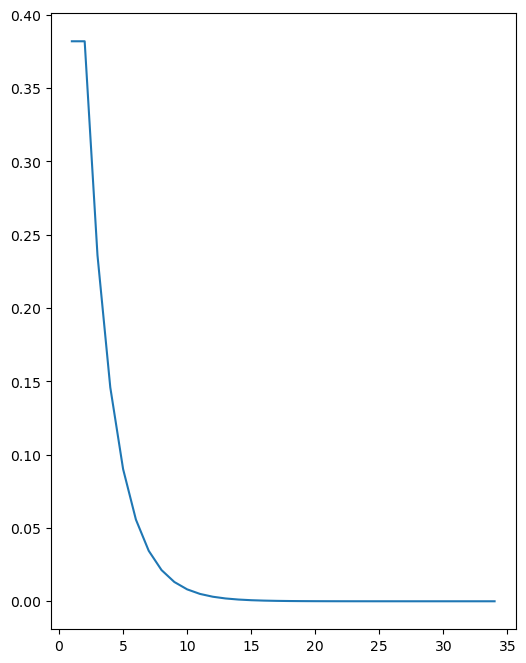

In [26]:
from matplotlib import pyplot as plt
(fig, ax)= plt.subplots(1,1,figsize=(6,8))
x=np.arange(1,35)
pows = phi**x
rounded = np.round(pows)
y=np.abs(pows - rounded)

ax.plot(x,y)

Well that certainly looks exponential.  Let's look at how well $\psi^n$ tracks $eps$.

In [53]:
tol = 1e-6
print(" n         phi^n           eps(n)         psi^n",end="\n\n")
for n in range(1,20):
    s,t = phi**(n),(-phi**(-1))**(n)
    print(f"{n:>2}  {s:>13.5f}    {round(s)-s:>13.5f} {t:>13.5f}")

 n         phi^n           eps(n)         psi^n

 1        1.61803          0.38197      -0.61803
 2        2.61803          0.38197       0.38197
 3        4.23607         -0.23607      -0.23607
 4        6.85410          0.14590       0.14590
 5       11.09017         -0.09017      -0.09017
 6       17.94427          0.05573       0.05573
 7       29.03444         -0.03444      -0.03444
 8       46.97871          0.02129       0.02129
 9       76.01316         -0.01316      -0.01316
10      122.99187          0.00813       0.00813
11      199.00502         -0.00502      -0.00502
12      321.99689          0.00311       0.00311
13      521.00192         -0.00192      -0.00192
14      842.99881          0.00119       0.00119
15     1364.00073         -0.00073      -0.00073
16     2206.99955          0.00045       0.00045
17     3571.00028         -0.00028      -0.00028
18     5777.99983          0.00017       0.00017
19     9349.00011         -0.00011      -0.00011


Perfectly!  In every case except $n=1$, $\psi^{-n}$ agrees with $eps$, and
in the case of $n=1$ it is exactly the difference between $\phi^{1}$ and 1, so not the nearest integer
in that case, but an integer.  What that means is that  for every single $n$ we have looked at (including 1) $\phi^{n} + \psi^{n}$  is an integer. We are a long way from proving that is true for every integer (though we will do so shortly), but let's think about what it it would mean for the puzzle we started out with if the following preposition were true:

> Proposition A (preliminary): For every  integer $n$, $\phi^{n} + \psi^{n}$ is an integer.

How would this shed light on the fact that $\phi^n$ grows closer to being an integer as $n$ grows?   It would explain it.Because $\psi^{n} = \phi^{-n}$ for even integers and $\psi^{n} = -\phi^{-n}$ for odd integers. As $n$ increases the value $\phi^{-n}$ grows rapidly smaller, and $\phi^n + \phi^{-n}$ and $\phi^n - \phi^{-n}$ simultaneously grow closer to $\phi^{n}$, so  if one of them must be an integer, necessarily $\phi^n$ would grow closer to an integer.  In fact we can say a little more based on the sign of $eps(n)$ in the data above:  For even values of $n$, $\phi^{n} + \phi^{-n}$ is an integer and for odd values  $\phi^{n} - \phi^{-n}$ is.  

The situation then is that we have solved our puzzle but only at the cost of creating a new one.  Why should Proposition A be true.  Is it true?  Are some of the apparent equalities in the printout above just approximate equalities, true only at low precision? Even if they aren't approximate equalities, is proposition A true for every $n$?

Let's consider some cases where proof is easy. 

1.  For $n=1$, consider $\phi^{1} - \phi^{-1} = 1$.   This is exact because it follows from the definition of $\phi$ ($\phi = 1 + \phi^{-1}$).
2.  For $n=2$,  recall from the discussion of the the closed form calculation of $F_{n}$  that:

$$
\begin{array}{lcl}
\sqrt{5} &= &\phi + \frac{1}{\phi}
\end{array}
$$

From this it immediately follows that


$$
\begin{array}{lcl}
5 & = & \left ( \phi + \frac{1}{\phi} \right ) ^2\\
  & = & \phi^{2} + 2 + \frac{1}{\phi^2}\\
3 & = &  \phi^{2} + \frac{1}{\phi^2}
\end{array}
$$

So we have another proof of exactness.  In order to address the general case we will 
need to prove somethings about powers of $\phi$.

##  Some facts about powers of $\phi$

Based also on the fact that $\phi = 1 + 1/\phi$,
or more usefully for present purposes,  $\phi^1 = \phi^0 + \phi^{-1}$, we have  this general Fibonacci-like relation among powers of $\phi$:

$$
\begin{array}{llcl}
(a) & \phi^1 = \phi^0 + \phi^{-1}\\
(b) & \phi^n = \phi^{n-1} + \phi^{n-2}\\
\end{array}
$$

where (b) is (a) multiplied by $\phi^{n-1}$.

Now we can reformulate this to actually use Fibbonacci numbers 
to compute powers of $\phi$ (not recommended for
the computationally conscientious):

   $$
\begin{array}{lclclcrl}
\phi^1 & &                &  &                    &=& \phi\\
\phi^2&= &  \phi^1 +\phi^0               &  &                    &=&  \, \phi + 1 \\
\phi^3 &=& \phi^2 +\phi  &=& (\phi + 1) + \phi &=& 2\,\phi + 1\\
\phi^4 &=& \phi^3 + \phi^2 && & =& 3\,\phi + 2 &\\
\phi^5 &=& \phi^4 + \phi^3 && &= & 5\,\phi + 3 &\\
\end{array}
    $$
   
In each case the expression on the right contains
Fibonacci coefficients and is computed by summing the two expressions above it.  That is, for any positive integer `n`, $\phi^{n}$ can be expressed in the form

$$
\begin{array}{lcl}
\mathbf{Fact} \,\mathbf{A}& &\\
\phi^{n}  = F_{n}\phi + F_{n-1},
\end{array}
$$

where $F_{n}$ is the nth Fibonacci number. A formal proof would use mathematical induction.  For now, we will satisfy ourselves with this informal demonstration.  In the previous section we contented ourselves with reducing facts about Fibonacci numbers to facts about $\phi$.  Now we have turned the tables.  We are defining powers of $\phi$ in terms of Fibonacci numbers.  As we will see, this will suit our current needs well, because we are interested in relating facts about powers  of $\phi$ to facts about integers.

 Now we examine a similar pattern for negative powers of  $\phi$:

 $$
\begin{array}{lclclcrr}
\phi^{1}  &=&                                       & &                    & & \phi\\
\phi^{0} &=&                                       & &                    & & 1\\
\phi^{-1} & = &  \phi^{1} - \phi^{0}              &  &                    &=& \phi - 1\\
\phi^{-2}&  =&    \phi^{0} - \phi^{-1}                & = &  1-(\phi-1)  &=& -\phi + 2 \\
\phi^{-3} &=& \phi^{-1} - \phi^{-2}  &=& (\phi - 1) - (2- \phi) &=& 2\,\phi -3 \\
\phi^{-4} &=& \phi^{-2} - \phi^{-3} && & =& -3\,\phi + 5 \\
\phi^{-5} &=& \phi^{-3} - \phi^{-4} && &= & 5\,\phi -8 \\
\phi^{-6} &=& \phi^{-4} - \phi^{-3} && &= & -8\,\phi +13 \\
\end{array}
    $$

where the first equality in each row follows from
$\phi^{n-1} + \phi^{n-2} = \phi^{n}$, which remains true for negative values of $n$, by simply
subtracting $\phi^{n-1}$ from both sides: $\phi^{n-2} = \phi^n - \phi^{n-1}$.

Generalization:  Each power is the difference of the previous two.  The successive subtractions lead
to swapping of signs between the $\phi$ term and the integer term, but apart from that the
generalization is very similar to the one about positive powers of $\phi$, which leads to fact B

$$
\begin{array}{lcl}
\mathbf{Fact} \,\mathbf{B}& &\\
\phi^{-n}  = (-1)^{n+1}\lbrack F_{n}\phi - F_{n+1} \rbrack.
\end{array}
$$


In sum we have for positive integers $n$:

$$
\begin{array}{lcl}
\mathbf{\phi^n}\, \mathbf{Rule}\,(\mathbf{Fact} \,\mathbf{A})& &\\
\phi^{n}  = F_{n}\phi + F_{n-1},
\end{array}
$$

$$
\begin{array}{c}
\mathbf{\phi^{-n}}\, \mathbf{Rule}\,(\mathbf{Fact} \,\mathbf{B})& &\\
\phi^{-n}  = (-1)^{n+1}\lbrack F_{n}\phi - F_{n+1} \rbrack.
\end{array}
$$

where in both cases $F_{n}$ is the nth Fibonacci number.  

This concludes our little digression on powers of $\phi$.

##  Back to our problem

Using facts A and B above it's easy to show that
$\phi^{n} + \phi^{-n}$ is an integer for all even $n$.  In fact,
for even $n$:


$$
\phi^{n} + \phi^{-n} = F_{n-1} + F_{n+1}
$$

Since $F_{n-1}$ and $F_{n+1}$ are not adjacent, the value is is not generally a Fibonacci number.

**Proof**:

$$
\begin{array}{llcll}
(a)&     & &           \phi^{n} + \phi^{-n} \\ 
(b)&     &=&            F_{n}\phi + F_{n-1} + (-1)^{n+1} \lbrack F_{n}\phi - F_{n+1}\rbrack \\        
\end{array}
$$

where step (b) applies facts A and B.

So when $n$ is even $(-1)^{n+1}$ becomes a minus sign and we have 
$$
\begin{array}{llcll}
(c)&                 &=&    F_{n}\phi + F_{n-1} - ( F_{n}\phi - F_{n+1}) \\  
(d) &                 &=&    F_{n}\phi + F_{n-1} -  F_{n}\phi + F_{n+1} \\  
(e) &                 &=&    F_{n-1}  + F_{n+1} \\  
\end{array}
$$

which is an integer.  If $n$ is odd the $\phi$  terms do not cancel.   Demonstrating:

In [80]:
tol = 1e-6
print("  n     phi^n+phi^-n  F_n-1    F_n+1       Python",end="\n\n")
for n in range(2,32,2):
    s = phi**(n) + phi**(-n)
    t = fibonacci_seq_n(n-1) + fibonacci_seq_n(n+1)
    lb,ub = fibonacci_seq_n(n-1),fibonacci_seq_n(n+1)
    print(f" {n:>2}      {t:>7.0f} {lb:>8} {ub:>8}    {s:<16.15f}")

  n     phi^n+phi^-n  F_n-1    F_n+1       Python

  2            3        1        2    3.000000000000000
  4            7        2        5    7.000000000000001
  6           18        5       13    18.000000000000004
  8           47       13       34    47.000000000000014
 10          123       34       89    123.000000000000043
 12          322       89      233    322.000000000000171
 14          843      233      610    843.000000000000341
 16         2207      610     1597    2207.000000000001364
 18         5778     1597     4181    5778.000000000003638
 20        15127     4181    10946    15127.000000000009095
 22        39603    10946    28657    39603.000000000029104
 24       103682    28657    75025    103682.000000000087311
 26       271443    75025   196418    271443.000000000232831
 28       710647   196418   514229    710647.000000000582077
 30      1860498   514229  1346269    1860498.000000002095476


where the first column is $n$, 
the power we're raising to, the second is $\phi^{n} + \phi^{-n}$,
the third and fourth are the nonadjacent Fibonacci numbers  
whose sum is equal to $\phi^{n} + \phi^{-n}$, and
where the decimal number with many 0s in the last column
is what Python actually returns for the computation $\phi^{n} + \phi^{-n}$.  You
can see the computational error grow as $n$ grows larger. 

By completely parallel reasoning, we arrive at a dual fact for odd values of $n$:

$$
\phi^{n} - \phi^{-n} = F_{n-1} + F_{n+1}
$$

**Exercise**:  Prove $\phi^{n} - \phi^{-n} = F_{n-1} + F_{n+1}$ for all odd integer values of $n$.


So the official answer to what function $eps(n)$ is should not be a surprise at this point:

$$
eps(n) = (-1)^{n}(\phi^{-1})^{n} = (-\phi^{-1})^{n}= \psi^{n}
$$

As suspected and made clear by the last two representations, $eps(n)$,
the difference between $\phi^n$ and its integer neighbnor, involves taking a power of a negative number,
the negative inverse of $\phi$ (called $\psi$ in the previous section of this notebook).

This allows us to finally present a fully specified version of Proposition A.

>  Proposition A (final): For all positive integer values of $n$, $\phi^{n} + \psi^{n} = F_{n-1}  + F_{n+1}$.

This immediately implies that $\phi^{n} + \psi^{n}$ is always an integer.
Let's call the larger function that $eps$ appears in in Proposition A $h$:

$$
h(n) = \phi^{n} + \psi^{n} =  \phi^{n} + (-\phi^{-1})^{n} = F_{n-1}  + F_{n+1}.
$$

Here I've written $h$ so as to highlight the similarity to the function that appears inside the brackets in
Binet's Formula, the closed form expression for $F_{n}$:

$$
F_{n} = \frac{1}{\sqrt{5}}  \,\lbrack \phi^{n} - \psi^{n} \rbrack = \frac{1}{\sqrt{5}}  \,\lbrack \phi^{n} -  (-\phi^{-1})^{n} \rbrack
$$

The difference is a mere change of sign.  Let's call the expression in the brackets $g$:

$$
\begin{array}{lcl}
h(n) &= &\phi^{n} + (-\phi^{-1})^{n}\\
g(n) &= & \phi^{n} - (-\phi^{-1})^{n}
\end{array}
$$

We'll briefly discuss the relationship of $h$, $g$ and Binet's Form in the last section.

Returning to the original puzzle of why $\phi^{n}$ approaches integerhood, we repeat those facts with
slightly different labeling.

In [85]:
def h(n):
    """
    h(n) = phi^n + (-phi^{-1})^n
    """
    return (np.power(phi,n) + np.power(-1,n)*(np.power(phi, -n)))

def g(n):
    """
    g(n) = phi^n - (-phi^{-1})^n
    """
    #return (phi**n - ((-1)**n)*(phi**(-n)))
    return (np.power(phi,n) - np.power(-1,n)*(np.power(phi, -n)))


tol = 1e-6 
print(" n       phi^n      phi^n + phi^-n  phi^n - phi^-n     h(n) ",end="\n\n")
for n in range(0,32):
    s = phi**(n) + phi**(-n)
    t = phi**(n) - phi**(-n)
    u = phi**n
    hn = int(h(n))
    print(f"{n:>2} {u:13.5f} {s:>13.5f}   {t:>13.5f}    {hn:>9,}")

 n       phi^n      phi^n + phi^-n  phi^n - phi^-n     h(n) 

 0       1.00000       2.00000         0.00000            2
 1       1.61803       2.23607         1.00000            1
 2       2.61803       3.00000         2.23607            3
 3       4.23607       4.47214         4.00000            4
 4       6.85410       7.00000         6.70820            7
 5      11.09017      11.18034        11.00000           11
 6      17.94427      18.00000        17.88854           18
 7      29.03444      29.06888        29.00000           29
 8      46.97871      47.00000        46.95743           47
 9      76.01316      76.02631        76.00000           76
10     122.99187     123.00000       122.98374          123
11     199.00502     199.01005       199.00000          199
12     321.99689     322.00000       321.99379          322
13     521.00192     521.00384       521.00000          521
14     842.99881     843.00000       842.99763          843
15    1364.00073    1364.00147      13

In the last few rows we see the pattern we noted at the beginning of
this discussion. For large $n$, it looks as if $\phi^{n}$ is an an integer,
and it looks as if both $\phi^n + \phi^{-n}$ and $\phi^n - \phi^{-n}$  are integers too,
but that is an artifact of the precision values used in printing those rows.
As we have seen,   $\phi^n$ is never an integer and $h(n)$ always is,
but the fact that $h(n) = \phi^n + \phi^{-n}$ for even integers and
$h(n) = \phi^n - \phi^{-n}$ for odd integers
means that $\phi^n$ must be a better and better approximation  of an integer.

We even understand what integer $\phi^{n}$ approaches:  $𝐹_{𝑛−1}+𝐹_{𝑛+1}$.  So to answer
the question in the title of this section:  When is $\phi^{n}$ an integer?  Never.
And the integer it never is is $𝐹_{𝑛−1}+𝐹_{𝑛+1}$.

### Relationship to closed form

The interesting pattern we've noted is $h(n)$ is always an integer and $\phi^{n}$ 
necessarily approaches it.  But as a bonus we've noted the close relationship to Binet's Formula,  the
the closed form calculation of $F_{n}$.  In this section we want to point out why exactly
that relationship exists.

Let's look simply at the sequence of values produced by `h`:

In [87]:
#print(" n         h(n)  h(n-1) + h(n-2)")
print(" n         h(n)  ")
for n in range(0,32):
    hn = int(h(n))
    try:
        hnp = int(h(n-1))+ int(h(n-2))
    except:
        hnp=0
    print(f"{n:>2}  {hn:>9}")

 n         h(n)  
 0          2
 1          1
 2          3
 3          4
 4          7
 5         11
 6         18
 7         29
 8         47
 9         76
10        123
11        199
12        322
13        521
14        843
15       1364
16       2207
17       3571
18       5778
19       9349
20      15127
21      24476
22      39603
23      64079
24     103682
25     167761
26     271443
27     439204
28     710647
29    1149851
30    1860498
31    3010349


This is a Fibonacci like sequence.  After $n=2$ each member is the sum of the previous two.

And this is not really a surprise, because
$h(n)$ qualifies as full-fledged member of the family of Fibonacci Sequences discussed
in the section entitled ****Binet's Form: A more illuminating derivation of Binet's Formula****; see the exercise in that section.  

The general form for a Fibonacci-like Sequence was called **Binet's Form** in that section.  Binet's Form is:

$$
\begin{array}{lcl}
\text{Binet}(n) &= & a\cdot\phi^{n} + b \cdot\psi^{n}\\
                &= & a\cdot\phi^{n} + b \cdot (-\phi^{-1})^{n}\\
\end{array}
$$

So $h$ is nothing more than an instance of Binet's form with $a=b=1$:

$$
\begin{array}{lcl}
h(n) & =& 1\cdot\phi^{n} + 1 \cdot(-\phi^{-1})^{n}\\
     & =& 1\cdot\phi^{n} + 1 \cdot \psi^{n}\\
\end{array}
$$


As the printout above shows, $h(0)$ and $h(1)$ are fully determined.

In [24]:
h(0),h(1)

(2.0, 1.0)

and even without the printout above,
the considerations discussed in defining Binet's Form would lead us to conclude:

$$
h(n+1) = h(n) + h(n-1)
$$

Done.  Full family affilation established.

Note that $g$ (the part of Binet's formula inside the square brackets) is **also**
an instance of Binet's form, with  $a=1,b=-1$  It's just that
it does not define  an integer sequence.  However, as $n$ grows large, it approaches
integerhood, just alternately undershooting and overshooting, much as $\phi^{n}$ does.  And
what it overshoots and undershoots, we now know, is $F_{n-1} + F_{n+1}$.

In [182]:
print(" n           g(n)        F_n-1 + F_n+1")
for n in range(2,32):
    gn = g(n)
    t = fibonacci_seq_n(n-1) + fibonacci_seq_n(n+1)
    print(f"{n:>2}  {gn:>17.9f}  {t:>9d}  ")

 n           g(n)        F_n-1 + F_n+1
 2        2.236067977          3  
 3        4.472135955          4  
 4        6.708203932          7  
 5       11.180339887         11  
 6       17.888543820         18  
 7       29.068883707         29  
 8       46.957427527         47  
 9       76.026311235         76  
10      122.983738762        123  
11      199.010049997        199  
12      321.993788760        322  
13      521.003838757        521  
14      842.997627517        843  
15     1364.001466275       1364  
16     2206.999093792       2207  
17     3571.000560067       3571  
18     5777.999653859       5778  
19     9349.000213927       9349  
20    15126.999867786      15127  
21    24476.000081713      24476  
22    39602.999949499      39603  
23    64079.000031212      64079  
24   103681.999980710     103682  
25   167761.000011922     167761  
26   271442.999992632     271443  
27   439204.000004554     439204  
28   710646.999997186     710647  
29  1149851.0000

We see that $g$ obeys the Fibonacci relation. For each $n$, $g(n)$ is the sum if the two values above it.
Of course $h$ and $g$ are perfectly good continuous functions as well, but they take  values in the complex numbers for non-integer values of $n$, so a plot showing that is as good a way as any to bid goodbye to this topic.

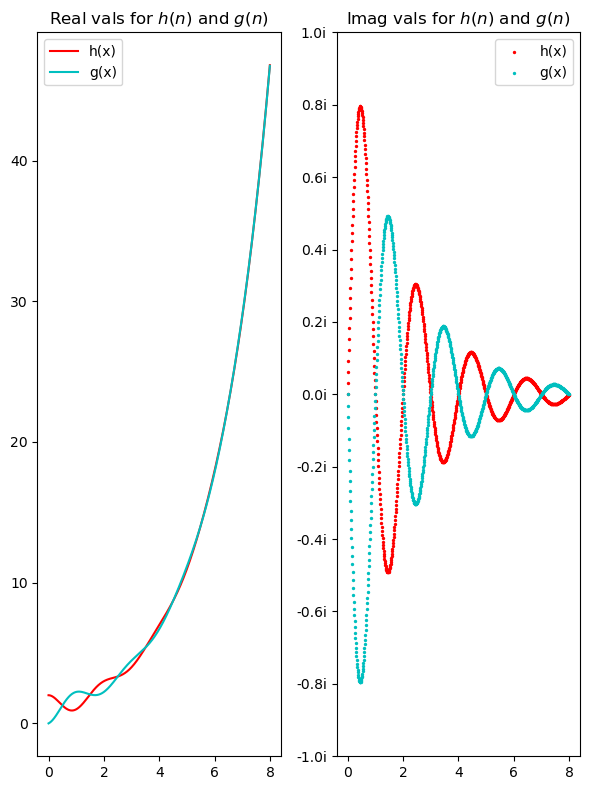

In [237]:
from matplotlib import pyplot as plt
(fig, (ax1,ax2)) = plt.subplots(1,2,figsize=(6,8))
x=np.arange(0,8,.01)
def hc(n):
    """
    h(n) allowing imaginary values, where h(n) is
    phi**n + ((-1)**n)*(phi**(-n))
    """
    return (np.power(phi,n) + np.power(-1+0j,n)*(np.power(phi, -n)))

def gc(n):
    """
    g(n) defined for nonintegers, allowing imaginary values
    """
    # g(n)
    #return (phi**n - ((-1)**n)*(phi**(-n)))
    return (np.power(phi,n) - np.power(-1+0j,n)*(np.power(phi, -n)))


hx = hc(x)
h_real = hx.real
h_imag = hx.imag
gx = gc(x)
g_real = gx.real
g_imag = gx.imag

#ax1.scatter(x,h_real,label="h(x).real",c="r",s=4)
ax1.plot(x,h_real,label="h(x)",c="r")
#ax1.scatter(x, g_real, label="g(x).real",c="c",s=4)
ax1.plot(x, g_real, label="g(x)",c="c")
ax1.legend()
ax1.set_title("Real vals for $h(n)$ and $g(n)$")
ax2.scatter(x,h_imag,label="h(x)",c="r",s=2)
ax2.scatter(x, g_imag, label="g(x)",c="c",s=2)
ax2.set_yticks(ax2.get_yticks(),[f"{yval:.1f}i" for yval in ax2.get_yticks()])
ax2.legend()
ax2.set_title("Imag vals for $h(n)$ and $g(n)$")
plt.tight_layout()
#ax.set_aspect("equal")

And the promised double helix appears at last.  This is really the picture driving our original puzzle, the spiraling dance of $h$ and $g$ in both graphs.   On the right, the imaginary components graph, necessarily $h$ and $g$ are symmetric with respect to the $x$-axis, since the coefficients of $i$ are determined entirely by their $\psi$-components, which are equal and opposite in sign.  When their imaginary components cross the $x$-axis, both $h$ and $g$ take real values, and those crossings are, of course, at integer values for $n$ (the plot is from $n=0$ to $n=8$).  On the left, $h$ takes integer values when it is real-valued, and $g$ does not.  The plot on the left is a better and better picture of $\phi^{n}$ as $n$ grows large, since $\phi^{n}$ is squeezed between $h$ and $g$.

####  Exercises for this section

**Exercise**: The function $\phi^{n}$  is also an instance of Binet's Form, of course, with $a=1,b=0$.   What are the starting values for $n=0$ and $n=1$?

**Exercise**: The function $(-\phi^{-1})^{n}$  is also an instance of Binet's Form, of course, with $a=0,b=1$.   What are the starting values for $n=0$ and $n=1$?

**Exercise**: Find another instance of Binet's Form which produces an integer sequence.  It should generate neither the standard Fibonacci Sequence ($a=1/\sqrt{5}$, $b=-1/\sqrt{5}$) nor a scalar multiple of it ($a=k/\sqrt{5}$, $b=-k/\sqrt{5}$ nor the Fibonacci cousin studied in this section  ($a=1$, $b=1$), nor a scalar multiple of it ($a=k$, $b=k$).  You should specify  $a$ and $b$, as well as the first 10 members of the sequence, including $S_{0}$ and $S_{1}$.  Hint: Pick some initial values that guarantee the above requirements will be met, and solve the Binet form equations for those initial values, as illustrated in **Binet's Form: A more illuminating derivation of Binet's Formula.**  If you can't simplify to a pretty form, just write some code to see if you are in fact generating an integer sequence, using your ugly form.

In [185]:
def i(n):
    """
    Binets form.  Solving the equations tp make S_0=1, S_1 = 4
    i(n) = phi^(n+1) + (-phi^{-1})^(n+1))
    """
    # Shifting  the F_{n-1}+F_{n+1} Fibonacci Sequence by setting a = phi^m and b = psi^m.  For m=3
    # a,b = phi**3, (-phi)**(-3)
    # Or solving the equations tp make S_0=1, S_1 = 4
    psi = -(phi**(-1))
    a = (4-psi)/np.sqrt(5)
    b = 1 - a
    return (a*np.power(phi,n)) + (b*np.power(-1,n)*(np.power(phi, -n)))

i(0),i(1),i(2),i(3)

(1.0, 4.0, 5.0, 9.0)

In [193]:
print(" n               h(n)         i(n)")
for n in range(0,32):
    i_n = i(n)
    try:
        hn = h(n)
    except:
        hn=0
    #t = 2*(fibonacci_seq_n(n-1) + fibonacci_seq_n(n+1))
    try:
        t = fibonacci_seq_n(n) + fibonacci_seq_n(n+2)
    except:
        t=0
    print(f"{n:>2} {i_n:>17.0f}  {t:>10}")

 n               h(n)         i(n)
 0                 1           0
 1                 4           3
 2                 5           4
 3                 9           7
 4                14          11
 5                23          18
 6                37          29
 7                60          47
 8                97          76
 9               157         123
10               254         199
11               411         322
12               665         521
13              1076         843
14              1741        1364
15              2817        2207
16              4558        3571
17              7375        5778
18             11933        9349
19             19308       15127
20             31241       24476
21             50549       39603
22             81790       64079
23            132339      103682
24            214129      167761
25            346468      271443
26            560597      439204
27            907065      710647
28           1467662     1149851
29      

In [170]:
hc(8),gc(8),1/np.sqrt(5)*gc(8)

((47.000000000000014+0j), (46.9574275274956+0j), (21.000000000000004+0j))

## Fibonacci and Pascal's Triangle

In [352]:

def make_pascals_triangle (nrows):
    """
    No printing version of make_pascals_triangle
    """
    
    L = [1]
    rows = []
    rows.append(L)
    for i in range(nrows):
        L = [1] + get_sums(L) + [1]
        rows.append(L)
    return rows

def get_sums (Seq):
    return [Seq[i]+Seq[i+1] for i in range(len(Seq)-1) ]

def print_pascal_row (L, num_rows,i,verbose):
    if not verbose:
        return
    # Row indent
    print((num_rows-i)*' ',end=" ")
    # Extra indent for rows lacking 2 digit entries
    if i<5:
        print("",end=" ")
    # Row
    print(*L)
    
def print_pascal_rows (rows):
    num_rows=len(rows)
    for (i,L) in enumerate(rows):
        print_pascal_row (L, num_rows,i,True)
    
    
############################################################################
# Numpy versions (for coding-style purposes only. actually slower memory hogs)
############################################################################


def make_pascals_triangle_numpy (nrows):
    first_row = np.array([1])
    r = first_row
    # Note use of Walrus operator (> Python 3.7).  This is a nice example
    # of where it comes in handy.  We want to both accumulate and
    # update values of r.
    return [first_row] + [r := get_next_row(r) for i in range(nrows)]

def get_next_row(r):
    """
    r is a row of a Pascalian triangle. Get next row.
    For example:
       row = array([1,2,1])
       return array([1, 3, 3, 1])
    """
    return np.concatenate([[0], r]) + np.concatenate([r, [0]])


Here, for easy reference, is a fragment of the Fibonacci Sequence:

```python
1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946
```

The triangle below, known as Pascal's Triangle, may be familiar as an aid to remembering the Binomial Theorem,
which tells us how to compute $(a + b)^n$:

In [485]:
rows = make_pascals_triangle(8)
print_pascal_rows (rows)

           1
          1 1
         1 2 1
        1 3 3 1
       1 4 6 4 1
     1 5 10 10 5 1
    1 6 15 20 15 6 1
   1 7 21 35 35 21 7 1
  1 8 28 56 70 56 28 8 1


Using 0-based indexing, the fourth row $1\, 4\, 6\, 4\, 1$ tells us the coeffients of all the $a^{i}b^{4-i}$ terms
in computing $(a + b)^4$.  As an example, let's compute $7^4$

In [227]:
7**4

2401

the hard way, as $(3 + 4)^4$.  Pascal's triangle tells us the coefficients will be
$1\, 4 \,6\, 4\, 1$, so:

In [397]:
rows = make_pascals_triangle_numpy(8)
n= 4
a,b = 4,3
coeffs = rows[n]
print(coeffs)
powers = [a**i*b**(n-i) for i in range(n+1)]
print(powers)
#powers = np.array([(3**4)*(4**0), (3**3)*(4**1), (3**2)*(4**2), (3**1)*(4**3), (4**4)*(3**0)])
coeffs.dot(powers)
#1*(3**4)*(4**0) + 4*(3**3)*(4**1) + 6*(3**2)*(4**2) + 4*(3**1)*(4**3) + 1*(4**4)*(3**0)

[1 4 6 4 1]
[81, 108, 144, 192, 256]


2401

So what does this have to do with Fibonacci numbers? There are lots of number in the triangle,
but plenty of them are not Fibonacci numbers, for example the 4 and 6 we just used. It turns out the 
diagonal sums of the triangle are the Fibonacci numbers in order, as shown in the following
diagram.

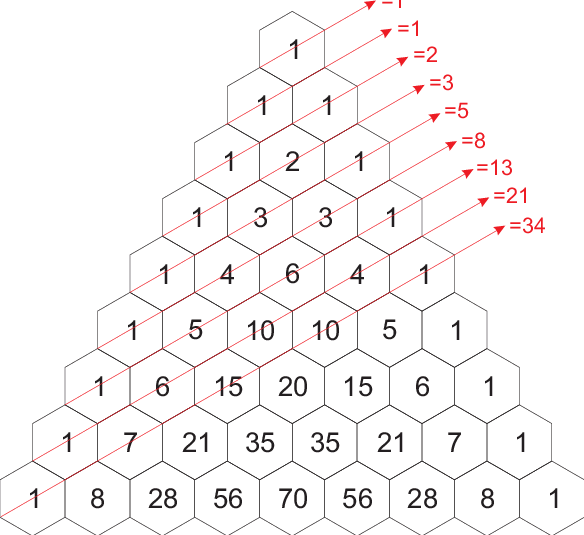

In [912]:
from IPython.display import Image
url = "https://raw.githubusercontent.com/gawron/python-for-social-science/refs/heads/master/intro/pascal.png"
#img = Image("pascal.png")
img = Image(url)
img

## Completely optional  appendix exercise

1.  The function `make_pascals_triangle` defined above gives you a working Pascal's triangle and the examples show how to use it.  Write a function `fib_n_from_pascal` that takes two arguments, `n` and a Pascal's Triangle of the sort produced by `make_pascals_triangle`; `fib_n_from_pascal` should return the $n$-th Fibonacci number (so `fib_n_from_pascal(n)` should equal `fibonacci_seq_n (n)`) and it should compute it by doing the correct diagonal sum in Pascal's triangle.  Once you have defined `fib_n_from_pascal`, the code snippet in the cell below should work.
2.  You know that the numbers in Pascal's Triangle are the coefficients in the Binomial Theorem. Modify  `fib_n_from_pascal` to eliminate its dependence on a precomputed Pascal's triangle table. Call the modified function   `fib_n_from_binomial`.  It should have a single parameter `n`.  Instead of summing entries in Pascal's triangular table it will sum appropriate binomial coefficients.  Note: if you have done part (a) of this problem, this should be a very small modification.  It is particularly small if you import a standard Python module that provides a function that computes binomial coefficients (it is not, however, named `compute_binomial_coeffient` or anything quite so transparent).  If not, refresh your memory of the Binomial theorem (Google it, I mean), which will tell you another way to compute the numbers in Pascal's Triangle.   Test it in an appropriately m,odified version of the code cell below.
3.  This is far from the easiest way to compute the $n$-th Fibonacci number. The closed form is, but it does avoid floating point issues and it sums n/2 numbers instead of n. So, probably no Nobel Prize in CS.  But this is fun.

In [608]:
m=20
# SHd produce same output as previous cell
rows = make_pascals_triangle(m)
# Makes no diff if rows has more than enough rows
#rows = make_pascals_triangle(m+5)
for n in range(1,m+1):
    print(f"{n:>2}   {fib_n_from_pascal (rows,n):>4}")

 1      1
 2      1
 3      2
 4      3
 5      5
 6      8
 7     13
 8     21
 9     34
10     55
11     89
12    144
13    233
14    377
15    610
16    987
17   1597
18   2584
19   4181
20   6765


In [602]:
m=20
# SHd produce same output as previous cell
for n in range(1,m+1):
    print(f"{n:>2}   {fibonacci_seq_n (n):>4}")


 1      1
 2      1
 3      2
 4      3
 5      5
 6      8
 7     13
 8     21
 9     34
10     55
11     89
12    144
13    233
14    377
15    610
16    987
17   1597
18   2584
19   4181
20   6765


In [566]:
m=20
# SHd produce same output as previous two cells
for n in range(m+1):
    print(f"{n:>2}   {fib_n_from_binomial (n):>3}")

 0     0
 1     1
 2     1
 3     2
 4     3
 5     5
 6     8
 7    13
 8    21
 9    34
10    55
11    89
12   144
13   233
14   377
15   610
16   987
17   1597
18   2584
19   4181
20   6765


In [607]:
import math

def fib_n_from_pascal (pt,m):
    """
    pt is a pascals triangle, n is an integer.
    
    Return the nth Fiobonacci number.
    """
    n=m-1
    # Need to count down from different starting points for odds and evens
    parity_bit = m%2
    return sum(pt[r][n-r] for r in range(n+parity_bit,n//2,-1))


def fib_n_from_pascal_alt (pt,m):
    """
    pt is a pascals triangle, n is an integer.
    
    Return the nth Fiobonacci number.
    """
    n=m-1
    r,tot=n,0
    while n-r<=r:
        tot += pt[r][n-r]
        r-=1
    return tot


def fib_n_from_binomial_alt(n):
    """
    This is the correct, more complicated version with no m,.n offset
    n is an integer.
    
    Return the nth Fiobonacci number.
    """
    r, tot = n-1,0
    while n-(r+1) <= r:
        tot += math.comb(r,(n-(r+1)))
        #print(n-r,r,math.comb(r,n-r), tot)
        r-=1
    return tot

def fib_n_from_binomial_minor_alt(m):
    """
    m is an integer.
    
    Return the mth Fibonacci number.
    """
    #  The code is simpler if you offset by 1
    #  Consistency with other fib fns requires
    #  fib_n_from_binomial(12) = 144 (not 233)
    n=m-1
    r, tot = n,0
    while n-r <= r:
        tot += math.comb(r,(n-r))
        #print(n-r,r,math.comb(r,n-r), tot)
        r-=1
    return tot

def fib_n_from_binomialx(m):
    """
    m is an integer.
    
    Return the mth Fibonacci number.
    """
    #  The code is simpler if you offset by 1
    #  Consistency with other fib fns requires
    #  fib_n_from_binomial(12) = 144 (not 233)
    n=m-1
    #rather than : r, tot = n//2,1
    # round up when n is odd
    r, tot = round(n/2),0
    while r <= n:
        tot += math.comb(r,n-r)
        #print(r,n-r,math.comb(r,n-r), tot)
        r+=1
    return tot

def fib_n_from_binomial(m):
    """
    m is an integer.
    
    Return the mth Fibonacci number.
    """
    #  The code is simpler if you offset by 1
    n=m-1
    return sum(math.comb(x,n-x) for x in range(round(n/2),n+1))

#### Final comments

$$
\text{Moe's Theorem}\\
\text{F}_{n+1} = \sum_{r=\lceil n/2 \rceil}^{n} {r \choose n-r} = \frac{-1}{\sqrt{5}}\left (\phi^{n+1} - (-\phi^{-1})^{n+1} \right)
$$

Notation note:  The expression $\lceil x \rceil$ denotes the smallest integer greater or equal to $x$, so for
example, $\lceil 11/2 \rceil$ is 6.

The truth of Moe's Theorem (Moe of Cretonia, 470 B.C.) should now be obvious.

###  Proof that $\text{A}^{m}v$ converges on the first eigenvector

Let $v_{0}$ be an arbitrary vector and let $v_{m}$ be the result of matrix mutltiplying
$A^{m}$ with $v_{0}$:

$$
v_{m}  = A^{m}v_{0}
$$

Now whatever $v_{0}$ is, Linear Algebra tells us we can
write $v_{0}$ as a linear combination of the eigenvectors  $e_{i}$ of A:

$$
v_{0} = \sum_{i} c_{i} e_{i},
$$

for appropriate choice of the $c_{i}$. Then 

$$
v_{m} = A^{m} \sum_{i} c_{i} e_{i} =  \sum_{i} c_{i} \kappa_{i}^{m}  e_{i} = \kappa_{1}^{m} \sum_{i} c_{i} \left \lbrack \frac{\kappa_{i}}{\kappa_{1}}\right \rbrack^{m} e_{i} 
$$

where $\kappa_{1}$ is the leading or largest eigenvalue and
we have made use of the fact that if $\kappa$ is
an eigenvalue of A, then $\kappa^{m}$ is an eigenvalue
of  $\text{A}^{m}$.   Then, since $\kappa_{i}/\kappa_{1} < 1$ whenever $i\neq 1$,
all the $i\neq 1$ terms will tend toward 0.  Then

$$
\lim_{m \to \infty} v_{m} = A^{𝑚} v_{0} = \kappa_{1}^{m} c_{1} \left \lbrack \frac{\kappa_{1}}{\kappa_{1}}\right \rbrack^{m} v_{1} 
= \kappa_{1}^{m} c_{1} e_{1} 
$$

That is, applying $A^{m}$ to **any** vector converges on a vector proportional to $e_{1}$, the first eigenvector of A. The significance of that is that any vector proportional to a first eigenvector $v_{1}$ is still a first eigenvector, that is, it is in the same
**eigenspace**, so we will get a vector that is a first eigenvector.  

## Ring of $\mathbb{Z}\left \lbrack \sqrt{5}\, \right \rbrack$ 

From a [Hacker news post.](https://news.ycombinator.com/item?id=2538724).  Compute $F_{n}$ in the ring
$\mathbb{Z}\left \lbrack \sqrt{5}\, \right \rbrack$.  The idea is to circumvent floating point calculations (and their associated inaccuracies?) by computing the core part of the $F_{n}$ calculation with
integers.

The ring $\left.\mathbb{Z}\left\lbrack\sqrt{d}\,\right\rbrack \right.$ is the set of all numbers of the form $a+b\sqrt{d}$, where $a$ and $b$ are integers

Pairs of ints in place of 1 float

```python
def Zsqrt5_to_Z(a,b):
    return a + np.sqrt(5)*b
```


Various operations in the ring $\mathbb{Z}\left\lbrack\sqrt{5}\right\rbrack$

1. (a,b)+(c,d) = (a+c,b+d)

2. (a,b)/sqrt(5) = (b,a/5)

3. (a,b)(c,d) = (ac+5bd,ad+bc)

4. 2phi = (1,1)

5.  F(n) = ((2phi)^n - (2-2phi)^n)/(2^n*sqrt(5)).  Uses the dfn of 2phi in 4.  This Binet's formula in 
-------------------------------------------
6.  sqrt(5) = (0,1) = phi + 1/phi

7.  phi = (.5,.5), so phi is not in the ring.

8.  1/phi = sqrt(5) - phi = (0,1)-(.5,.5) = (-.5,.5), so  1/phi ios notin the ring.

9. (a,b)^2 = (a,b)(a,b) = (aa+5bb,ab+ba) = (a^2+5b^2,a^2b^2)
    (3) with c=a,d=b
    

10. Point of Emphasis: the mapping `Z_to_Z5` is only partial, as shown above.  We have
    
    $$
    \phi = .5 + .5 \sqrt{5}
    $$
    
    But these are not integers, so $\phi$ is not in the ring.  But
    
    $$
    2\phi = 1 + 1 \sqrt{5},
    $$
    
    so $2\phi$ is in the ring.  
    
11.  Similarly, $\phi^{-1}$ is not in ring because

     $$
     \phi^{-1} = -.5 + .5 \sqrt{5}.
     $$
  
  
     but $2\phi^{-1}$ is, because 
    
  
     $$
     2\phi^{-1} = -1 + 1 \sqrt{5}.
     $$
  
12.   For any integer $n$, $n \in \mathbb{Z}\left\lbrack\sqrt{d}\right\rbrack$ as $(n,\,0)$.

13.  $2-2\phi \in \mathbb{Z}\left\lbrack\sqrt{d}\right\rbrack$  as  $(2,\,0)-(1,\,1) =(1,\,-1)$.

14.  This shows how the computation of $F_{n}$ can be done in $\mathbb{Z}\left\lbrack\sqrt{5}\right\rbrack$

     $$
     \begin{array}{lcl}
     F_{n} &= & \frac{2^{n}}{2^{n}\sqrt{5}}\left \lbrack\phi^n - (1-\phi)^n)\right \rbrack\\
          &= & \frac{1}{2^{n}\sqrt{5}}\left\lbrack 2^{n}\phi^n - 2^{n}(1-1\phi)^n)\right\rbrack\\
          &= &  \frac{1}{2^{n}\sqrt{5}}\left\lbrack (2\phi)^n - (2-2\phi)^n)\right\rbrack
     \end{array}
     $$
     
     We know $(2\phi)$ and $(2-2\phi)$  are in the ring.  Do we know the ring is closed under multiplication?  It is because of point 3 above.  Therefore it is closed under power-taking. We know the ring is closed under division by $\sqrt{5}$ (shown above) and closed under division in general when the result is an integer, and it must be here because the result is a Fibonacci number.

In [167]:
import numpy as np
phi = (1 + np.sqrt(5))/2
psi = -(1/phi)
#3^2= (3,0)^2
three_Zsqrt5 = np.array((3,0))
nine_Zsqrt5  = np.array((9,0))
phi_Zsqrt5 = np.array((.5,.5))
two_phi_Zsqrt5 = np.array((1,1))
# This is 2*((phi^{-1}))
two_phi_inv_Zsqrt5 = np.array((-1,1))
# This is 2*(-(phi^{-1}))
two_psi_Zsqrt5 = np.array((1,-1))
two_phi = 2*phi


def times_Zsqrt5 (x,y):
    (a,b),(c,d) = (x,y)
    return  ((a*c)+(5*b*d),(a*d)+(b*c))

def plus_Zsqrt5 (x,y):
    #(a,b),(c,d) = (x,y)
    return  (x[0]+y[0],x[1]+y[1])

def minus_Zsqrt5 (x,y):
    #(a,b),(c,d) = (x,y)
    return  (x[0]-y[0],x[1]-y[1])

def two_phi_pow_Zsqrt5 (n):
    res = two_phi_Zsqrt5 
    for i in range(n-1):
        res = times_Zsqrt5(two_phi_Zsqrt5, res)
    return res

def two_psi_pow_Zsqrt5 (n):
    """
    That is (2psi)^n
    """
    res = two_psi_Zsqrt5
    for i in range(n-1):
        res = times_Zsqrt5(two_mpsi_Zsqrt5, res)
    return res


def two_phi_pow_Zsqrt5_2(n):
    return 2**n * phi_pow_Z(n)

def times_sqrt_5_inv_Zsqrt5 (a,b):
    return (b,a/5)

def square_Zsqrt5 (a,b):
    return  ((a**2)+5*(b**2),(a**2)+(b**2))

def Zsqrt5_to_Z(a,b):
    return a + np.sqrt(5)*b


def fib_Zsqrt5 (n):
    """
    Ok. I confess.  Doing the last step (dividing by 2**n) in Z rather than in Z[sqrt{5}].
    Otherwise a faithful implementation of the idea
    
    Could be fixed with a divide_by_int_Zsqrt5 fn.   Which by all rights would need a membership 
    check (assert (q[0]%1  == 0) and (q[1]%1  == 0), f"{q} is not in the ring") because this
    is not a general operation on the ring. Or go completelt binary on the int reps, so 
    divdiing x by 2^n is a rightward shift of n bits, legal when the last n binary digits of x are 0.
    
    Warning this encounters int overflow warnings for n> 37
    """
    return Zsqrt5_to_Z(*times_sqrt_5_inv_Zsqrt5 (*minus_Zsqrt5 (two_phi_pow_Zsqrt5(n),two_psi_pow_Zsqrt5(n))))/2**n

#########################################################
# Unneeded and incorrect
#########################################################

def phi_pow_Zsqrt5 (n):
    """
    phi is not in the ring.  two_phi is.  So we
    do this weirdly.
    """
    return two_phi_pow_Zsqrt5 (n)/2**n

def phi_pow_Zsqrt5(n):
    """
    This is correct but not computed in the ring.,
    """
    return ((fibonacci_seq_n(n) * phi_Z5) + np.array([fibonacci_seq_n(n-1),0]))

def phi_inv_pow_Zsqrt5(n):
    """
    This is correct but not computed in the ring.,
    """
    return ((fibonacci_seq_n(n) * phi_Z5) + (-1)**(n+1)* np.array([fibonacci_seq_n(n-1),0]))


def Z_to_Zsqrt5 (x):
    """
    Incorrect version
    
    Check for membership in the ring, then return integer pair
    
    This works for  2phi and 2psi and correctly rejects phi and psi.
    
    This is the hard case
    
        x = np.sqrt(5)-1  |-> (-1, 1)
        b,a = divmod(x,np.sqrt(5))
        >>> b,a
        (0.0, 1.2360679774997898)  # == x
    """
    if x%1  == 0:
        return (x,0)
    else:
        b,a = divmod(x,np.sqrt(5))
        assert (a%1  == 0) and (b%1  == 0), f"{x} is not in the ring"
        return (a,b)


#print(Zsqrt5_to_Z(*three_Zsqrt5),Zsqrt5_to_Z(*nine_Zsqrt5))

#square_Zsqrt5 (*phi_Zsqrt5)

`fib_Zsqrt5` uses Binet's formula but is in fact more accurate than the  straightforward implementation of Binet's Formula.

In [168]:
n=37
fib_Zsqrt5 (n)

24157817.0

Binet's Formula:

In [164]:
1/np.sqrt(5)*(phi**n - psi**n)

24157817.000000026

The iterative calculation.

In [165]:
fibonacci_seq_n(n)

24157817

In my implementation (which could stand improvement), the function `fib_Zsqrt5` is in fact both slower and more restricted than the other Fibonacci functions.  It is more restricted in that it incurs int overflow warnings for values of `n` over 37

The error arises in a muliplication step in calculating $(2\phi)^{n}$

In [110]:
n=38
two_phi_pow_Zsqrt5(n)

/var/folders/w9/bx4mylnd27g_kqqgn5hrn2x40000gr/T/ipykernel_1161/1657987761.py:17: RuntimeWarning: overflow encountered in scalar add
  return  ((a*c)+(5*b*d),(a*d)+(b*c))


(-6434056859916697600, 5372237040496672768)

The solution is to switch to an "open" representation of integers such as a binary array of arbitrary length, with no "max int."